# Temperature Forecast Project using ML
# Project Description
# This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:
# For more information, read .
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# LET'S IMPORT OUR DATASET

In [2]:
temperature=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
temperature

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
temperature.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [4]:
temperature.shape

(7752, 25)

AS WE CAN SEE THAT THERE ARE 25 COLUMNS AND 7752 TROWS ARE PRESENT IN THE DATASET WHICH IS KIND OF NOT LARGE NIETHER SMALL 

In [5]:
temperature.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

AS YOU CAN SEE THAT THERE ARE MANY NULL VALUES PRESENT IN THE DATASET OF THE TEMPERATURE SO WE HAVE TO REWMOV THAT NULL VALUES FROM THE DATASET WE HAVE TO DROP THAT NULL VALUES IN THE DATASET

In [6]:
pd.set_option("display.max_columns",None)
temperature

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
0      0.233947   0.203896   0.161697   0.130928    0.000000    0.000000   
1      0.225508   0.251771   0.159444   0.127727    0.000000    0.000000   
2      0.209344   0.257469   0.204091   0.142125    0.000000    0.000000   
3      0.216372   0.226002   0.161157   0.134249    0.000000    0.000000   
4      0.151407   0.249995   0.178892   0.170021    0.000000    0.000000   
...         ...        ...        ...        ...         ...         ...   
7747   0.030034   0.081035   0.000000   0.000000    0.000000    0.000000   
7748   0.035874   0.074962   0.000000   0.000000    0.000000    0.000000   
7749   0.048954   0.059869   0.000000   0.000796    0.000000    0.000000   
7750   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
7751   0.967277   0.968353   0.983789   0.974710   23.701544   21.621661   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0       0.000000    0.000000  37.6046  126.991  212.3350  2.785000   
1       0.000000    0.000000  37.6046  127.032   44.7624  0.514100   
2       0.000000    0.000000  37.5776  127.058   33.3068  0.266100   
3       0.000000    0.000000  37.6450  127.022   45.7160  2.534800   
4       0.000000    0.000000  37.5507  127.135   35.0380  0.505500   
...          ...         ...      ...      ...       ...       ...   
7747    0.000000    0.000000  37.5372  126.891   15.5876  0.155400   
7748    0.000000    0.000000  37.5237  126.909   17.2956  0.222300   
7749    0.000000    0.000000  37.5237  126.970   19.5844  0.271300   
7750    0.000000    0.000000  37.4562  126.826   12.3700  0.098475   
7751   15.841235   16.655469  37.6450  127.135  212.3350  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
0         5992.895996       29.1       21.2  
1         5869.312500       30.5       22.5  
2         5863.555664       31.1       23.9  
3         5856.964844       31.7       24.3  
4         5859.552246       31.2       22.5  
...               ...        ...        ...  
7747      4443.313965       28.3       18.1  
7748      4438.373535       28.6       18.8  
7749      4451.345215       27.8    

In [7]:
# let's drop the null values from the dataset here we can drop the null values because 75 is very small compared to 7752 rows we can drop it not affect dataset
temperature=temperature.dropna()

In [8]:
temperature

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936  6.818887   69.451805   
1       90.604721         29.850689         24.035009  5.691890   51.937448   
2       83.973587         30.091292         24.565633  6.138224   20.573050   
3       96.483688         29.704629         23.326177  5.650050   65.727144   
4       90.155128         29.113934         23.486480  5.735004  107.965535   
...           ...               ...               ...       ...         ...   
7745    78.261383         27.812697         18.303014  6.603253    9.614074   
7746    83.690018         26.704905         17.814038  5.768083   82.146707   
7747    78.869858         26.352081         18.775678  6.148918   72.058294   
7748    77.294975         27.010193         18.733519  6.542819   47.241457   
7749    77.243744         27.939516         18.522965  7.289264    9.090034   

      LDAPS_CC1  LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
0      0.233947   0.203896  1.616969e-01   0.130928         0.0         0.0   
1      0.225508   0.251771  1.594441e-01   0.127727         0.0         0.0   
2      0.209344   0.257469  2.040915e-01   0.142125         0.0         0.0   
3      0.216372   0.226002  1.611574e-01   0.134249         0.0         0.0   
4      0.151407   0.249995  1.788925e-01   0.170021         0.0         0.0   
...         ...        ...           ...        ...         ...         ...   
7745   0.052902   0.030169  0.000000e+00   0.004380         0.0         0.0   
7746   0.066461   0.024518  5.850000e-07   0.017678         0.0         0.0   
7747   0.030034   0.081035  0.000000e+00   0.000000         0.0         0.0   
7748   0.035874   0.074962  0.000000e+00   0.000000         0.0         0.0   
7749   0.048954   0.059869  0.000000e+00   0.000796         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0            0.0         0.0  37.6046  126.991  212.3350  2.7850   
1            0.0         0.0  37.6046  127.032   44.7624  0.5141   
2            0.0         0.0  37.5776  127.058   33.3068  0.2661   
3            0.0         0.0  37.6450  127.022   45.7160  2.5348   
4            0.0         0.0  37.5507  127.135   35.0380  0.5055   
...          ...         ...      ...      ...       ...     ...   
7745         0.0         0.0  37.5507  127.040   26.2980  0.5721   
7746         0.0         0.0  37.5102  127.086   21.9668  0.1332   
7747         0.0         0.0  37.5372  126.891   15.5876  0.1554   
7748         0.0         0.0  37.5237  126.909   17.2956  0.2223   
7749         0.0         0.0  37.5237  126.970   19.5844  0.2713   

      Solar radiation  Next_Tmax  Next_Tmin  
0         5992.895996       29.1       21.2  
1         5869.312500       30.5       22.5  
2         5863.555664       31.1       23.9  
3         5856.964844       31.7       24.3  
4         5859.552246       31.2       22.5  
...               ...        ...        ...  
7745      4456.024414       27.6       17.7  
7746      4441.803711       28.0       17.1  
7747      4443.313965       28.3    

AS YOU CAN SE BEFORE DROPPING NULL VALUES TOTAL ROWS WERE 7752 AND NOW AFTER DROPPING THE NULL VALUES TOTAL ROWS PERSENT IN THE DATASET ARE 7588 THAT'S WHY NOW WE CAN DO SOME ANALYSIS

In [9]:
# LET'S AGAIN CHECK THE NULL VALUES PRESENT IN THE DATSET 
temperature.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

AS YOU CAN SEE THAT NO NULL VALUES PRESENT IN THE DATSET SO WE CAN DO SOME ANALYSIS FURTHER 

In [10]:
temperature.nunique()

station               25
Date                 307
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
dtype: int64

In [11]:
temperature.duplicated().sum()

0

AS WE CAN SEE THAT THERE ARE NO DUPLICATED VALUES PRESENT IN THE DATASET 

In [12]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


AS WE CAN SEE THAT EXCEPT DATE COLUMN ALL OTHER COLUMNS ARE FLOAT DATATYPES AND I ASLO WANT SEPRATE THE DATE COLUMN INTO THE DATE , MONTH AND YEAR COLUMN 

In [13]:
# LET'S CONVERT FIRST DATE TO DATE-TIME FORAMT 
temperature["Date"]=pd.to_datetime(temperature["Date"])


In [14]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7588 non-null   float64       
 1   Date              7588 non-null   datetime64[ns]
 2   Present_Tmax      7588 non-null   float64       
 3   Present_Tmin      7588 non-null   float64       
 4   LDAPS_RHmin       7588 non-null   float64       
 5   LDAPS_RHmax       7588 non-null   float64       
 6   LDAPS_Tmax_lapse  7588 non-null   float64       
 7   LDAPS_Tmin_lapse  7588 non-null   float64       
 8   LDAPS_WS          7588 non-null   float64       
 9   LDAPS_LH          7588 non-null   float64       
 10  LDAPS_CC1         7588 non-null   float64       
 11  LDAPS_CC2         7588 non-null   float64       
 12  LDAPS_CC3         7588 non-null   float64       
 13  LDAPS_CC4         7588 non-null   float64       
 14  LDAPS_PPT1        7588 n

In [15]:
# NOW LET;S DIVIDE THE DATE INTO THREE PARTS DAY,MOHNTH  AND YEARdf['Year'] = df['Date'].dt.year
temperature['Year'] = temperature['Date'].dt.year
temperature['Month'] = temperature['Date'].dt.month
temperature['Day'] = temperature['Date'].dt.day

In [16]:
temperature

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0 2013-06-30          28.7          21.4    58.255688   
1         2.0 2013-06-30          31.9          21.6    52.263397   
2         3.0 2013-06-30          31.6          23.3    48.690479   
3         4.0 2013-06-30          32.0          23.4    58.239788   
4         5.0 2013-06-30          31.4          21.9    56.174095   
...       ...        ...           ...           ...          ...   
7745     21.0 2017-08-30          23.1          17.8    24.688997   
7746     22.0 2017-08-30          22.5          17.4    30.094858   
7747     23.0 2017-08-30          23.3          17.1    26.741310   
7748     24.0 2017-08-30          23.3          17.7    24.040634   
7749     25.0 2017-08-30          23.2          17.4    22.933014   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936  6.818887   69.451805   
1       90.604721         29.850689         24.035009  5.691890   51.937448   
2       83.973587         30.091292         24.565633  6.138224   20.573050   
3       96.483688         29.704629         23.326177  5.650050   65.727144   
4       90.155128         29.113934         23.486480  5.735004  107.965535   
...           ...               ...               ...       ...         ...   
7745    78.261383         27.812697         18.303014  6.603253    9.614074   
7746    83.690018         26.704905         17.814038  5.768083   82.146707   
7747    78.869858         26.352081         18.775678  6.148918   72.058294   
7748    77.294975         27.010193         18.733519  6.542819   47.241457   
7749    77.243744         27.939516         18.522965  7.289264    9.090034   

      LDAPS_CC1  LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
0      0.233947   0.203896  1.616969e-01   0.130928         0.0         0.0   
1      0.225508   0.251771  1.594441e-01   0.127727         0.0         0.0   
2      0.209344   0.257469  2.040915e-01   0.142125         0.0         0.0   
3      0.216372   0.226002  1.611574e-01   0.134249         0.0         0.0   
4      0.151407   0.249995  1.788925e-01   0.170021         0.0         0.0   
...         ...        ...           ...        ...         ...         ...   
7745   0.052902   0.030169  0.000000e+00   0.004380         0.0         0.0   
7746   0.066461   0.024518  5.850000e-07   0.017678         0.0         0.0   
7747   0.030034   0.081035  0.000000e+00   0.000000         0.0         0.0   
7748   0.035874   0.074962  0.000000e+00   0.000000         0.0         0.0   
7749   0.048954   0.059869  0.000000e+00   0.000796         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0            0.0         0.0  37.6046  126.991  212.3350  2.7850   
1            0.0         0.0  37.6046  127.032   44.7624  0.5141   
2            0.0         0.0  37.5776  127.058   33.3068  0.2661   
3            0.0         0.0  37.6450  127.022   45.7160  2.5348   
4            0.0         0.0  37.5507  127.135   35.0380  0.5055   
...          ...         ...      ...      ...       ...     ...   
7745         0.0         0.0  37.5507  127.040   26.2980  0.5721   
7746         0.0         0.0  37.5102  127.086   21.9668  0.1332   
7747         0.0         0.0  37.5372  126.891   15.5876  0.1554   
7748         0.0         0.0  37.5237  126.909   17.2956  0.2223   
7749         0.0         0.0  37.5237  126.970   19.5844  0.2713   

      Solar radiation  Next_Tmax  Next_Tmin  Year  Month  Day  
0         5992.895996       29.1       21.2  2013      6   30  
1         5869.312500       30.5       22.5  2013      6   30  
2         5863.555664       31.1       23.9  2013      6   30  
3         5856.964844       31.7       24.3  2013      6   30  
4         5859.552246       31.2       22.5  2013      6   30  
...               ...        ...        ...   ...    ...  ...  
7745      4456

In [17]:
# NOW LET'S DROP THE DATE FROM THE DATASSET
temperature.drop(columns=["Date"],axis=1,inplace=True)

In [18]:
temperature

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.203896  1.616969e-01   0.130928         0.0         0.0         0.0   
1      0.251771  1.594441e-01   0.127727         0.0         0.0         0.0   
2      0.257469  2.040915e-01   0.142125         0.0         0.0         0.0   
3      0.226002  1.611574e-01   0.134249         0.0         0.0         0.0   
4      0.249995  1.788925e-01   0.170021         0.0         0.0         0.0   
...         ...           ...        ...         ...         ...         ...   
7745   0.030169  0.000000e+00   0.004380         0.0         0.0         0.0   
7746   0.024518  5.850000e-07   0.017678         0.0         0.0         0.0   
7747   0.081035  0.000000e+00   0.000000         0.0         0.0         0.0   
7748   0.074962  0.000000e+00   0.000000         0.0         0.0         0.0   
7749   0.059869  0.000000e+00   0.000796         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  \
0            0.0  37.6046  126.991  212.3350  2.7850      5992.895996   
1            0.0  37.6046  127.032   44.7624  0.5141      5869.312500   
2            0.0  37.5776  127.058   33.3068  0.2661      5863.555664   
3            0.0  37.6450  127.022   45.7160  2.5348      5856.964844   
4            0.0  37.5507  127.135   35.0380  0.5055      5859.552246   
...          ...      ...      ...       ...     ...              ...   
7745         0.0  37.5507  127.040   26.2980  0.5721      4456.024414   
7746         0.0  37.5102  127.086   21.9668  0.1332      4441.803711   
7747         0.0  37.5372  126.891   15.5876  0.1554      4443.313965   
7748         0.0  37.5237  126.909   17.2956  0.2223      4438.373535   
7749         0.0  37.5237  126.970   19.5844  0.2713      4451.345215   

      Next_Tmax  Next_Tmin  Year  Month  Day  
0          29.1       21.2  2013      6   30  
1          30.5       22.5  2013      6   30  
2          31.1       23.9  2013      6   30  
3          31.7       24.3  2013      6   30  
4          31.2       22.5  2013      6   30  
...         ...        ...   ...    ...  ...  
7745       27.6       17.7  2017      8   30  
7746       28.

In [19]:
temperature["station"].value_counts()

25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: station, dtype: int64

In [20]:
temperature["Year"].value_counts()

2014    1547
2015    1533
2013    1510
2017    1506
2016    1492
Name: Year, dtype: int64

In [21]:
temperature["Next_Tmax"].max()

38.9

In [22]:
temperature["Next_Tmax"].min()

17.4

AS YOU CAN SEE THAT MAX TEMPERATURE DURING THE NEXT DAY COLUMN WAS 38.9 AMD MINIMUM TEMPERATURE WAS 17.4
SO NEXT MAXMIMUM TEMPERATURE OF AIR ILL BE RECODED AS HIGH AS 17.4 TO 39.8

In [23]:
temperature["Next_Tmin"].max()

29.8

In [24]:
temperature["Next_Tmin"].min()

11.3

AS WE CAN SEE THAT NEXT DAY MINIMUM TEMPEARTURE WAS RECORDED WAS 11.3 WHICH IS VERY LOW AND MAXIMUM RECORDED IN THE MIMIMUM AIR TEMPERATURE WAS 29.8

SO THE RANGE AT WHICH NEXT DAY TEMPEARTURE WILL VARY FROM AS LOWS 11.3 TO 29.8 

In [25]:
temperature["Slope"].value_counts()

0.2713    307
5.1782    307
0.1554    307
1.2313    307
0.6970    307
0.5141    307
0.2661    306
2.5348    306
2.6865    305
2.2579    304
4.7296    304
0.5721    304
0.6180    303
2.7850    303
0.4125    302
0.5931    302
0.8552    302
1.7678    302
0.1332    302
0.2223    302
0.6233    301
0.0985    301
0.1457    301
1.5629    300
0.5055    296
Name: Slope, dtype: int64

In [26]:
temperature.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510     0.355528     0.317546     0.298268     0.589008   
std       0.262260     0.257922     0.249833     0.253392     1.927577   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146546     0.140324     0.100950     0.081495     0.000000   
50%       0.315706     0.311676     0.261795     0.227459     0.000000   
75%       0.574174     0.557164     0.496444     0.498127     0.052594   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat         lon  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.00000   
mean      0.480738     0.275007     0.265373    37.544792   126.99142   
std       1.743327     1.146087     1.179661     0.050428     0.07922   
min       0.000000     0.000000     0.000000    37.456200   126.82600   
25%       0.000000     0.000000     0.000000    37.510200   126.93700   
50%       0.000000     0.000000     0.000000    37.550700   126.99500   
75%       0.017735     0.007855     0.000017    37.577600   127.04200   
max      21.621661    15.841235    16.655469    37.645000   127.13500   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  \
count  7588.000000  7588.000000      7588.000000  7588.000000  7588.000000   
mean     61.918136     1.259755      5343.724208    30.241526    22.910820   
std      54.323529     1.372748       429.782561     3.111807     2.482256   
min      12.370000     0.098500      4329.520508    17.400000    11.300000   
25%      28.700000     0.271300      5001.485717    28.200000    21.300000   
50%      45.716000     0.618000      5441.987305    30.400000    23.100000   
75%      59.832400     1.767800      5729.485840    32.600000    24.600000   
max     212.335000     5.178200      5992.895996    38.900000    29.800000   

              Year        Month          Day  
count  7588.000000  7588.000000  7588.000000  
mean   2014.991697     7.068134    16.337375  
std       1.410877     2.242389     8.216880  
min    2013.000000     1.000000     7.000000  
25%    2014.000000     7.000000     8.000000  
50%    2015.000000     7.000000    16.000000  
75%    2016.000000     8.000000    24.000000  
max    2017.000000    12.000000    31.000000

AS YOU CAN SEE THAT THE TOTAL COUNT FOR ALL THE COLUMNS ARE ALMOST SAME SO WE CAM ASY THTA THERE ARE NO MISSING VALUES PRESENT IN THE DATASET

1. AS WE CAN SEE THAT MEAN IS ALMOST EQUAL TO 2ND QUARTILE SO MAYBE THERE IS LESS CHANCE OF SKWENESS OF ANY KIND PRESENT BUT FOR THAT WE HAVE TO CONFIRM 

2. AS WE CAN ALSO SEE THAT 3RD QUARTILE LESS THAN MAX WHICH MEAN STHERE IS CHANCE OF OUTLIERS PRESENT IN THE DATASET THAT ALSONWE HAVE TO CONFIRM 

# DATA VISUALIZATION

# UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='station', ylabel='count'>

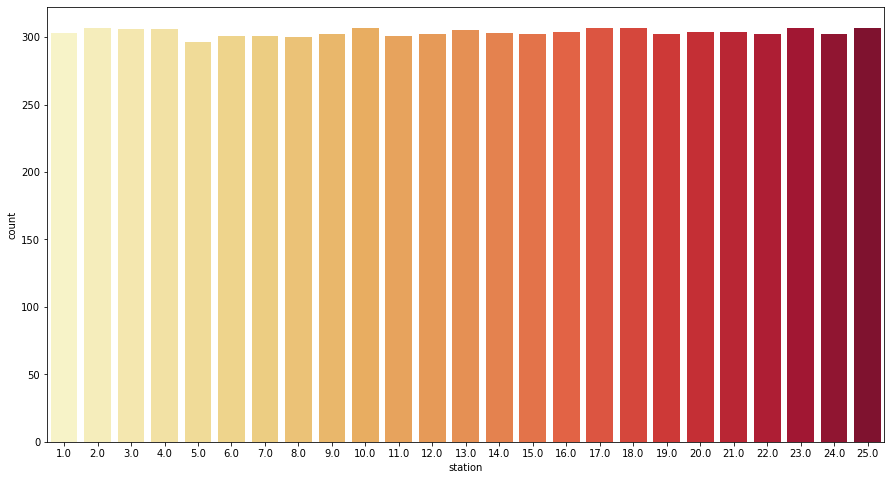

In [27]:
# LET'S PLOT CONTPLOT TO CHECK THE DETAILS 
plt.figure(figsize=(15,8))
sns.countplot(x="station",data=temperature,palette='YlOrRd')

AS YOU CAN SEE THAT THERE ARE MORE NUMBER OF 2, 3 4 NO OF WETHAR STATION INSTALLED OR USED TO FORECAST TEMPERATURE

<AxesSubplot:xlabel='Slope', ylabel='count'>

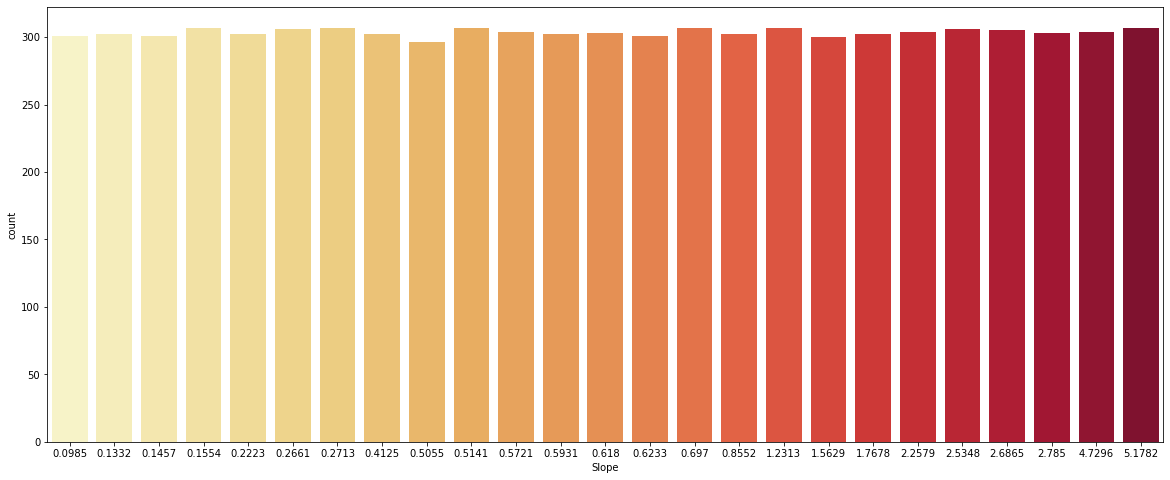

In [28]:
plt.figure(figsize=(20,8))
sns.countplot(x="Slope",data=temperature,palette='YlOrRd')

<AxesSubplot:xlabel='Year', ylabel='count'>

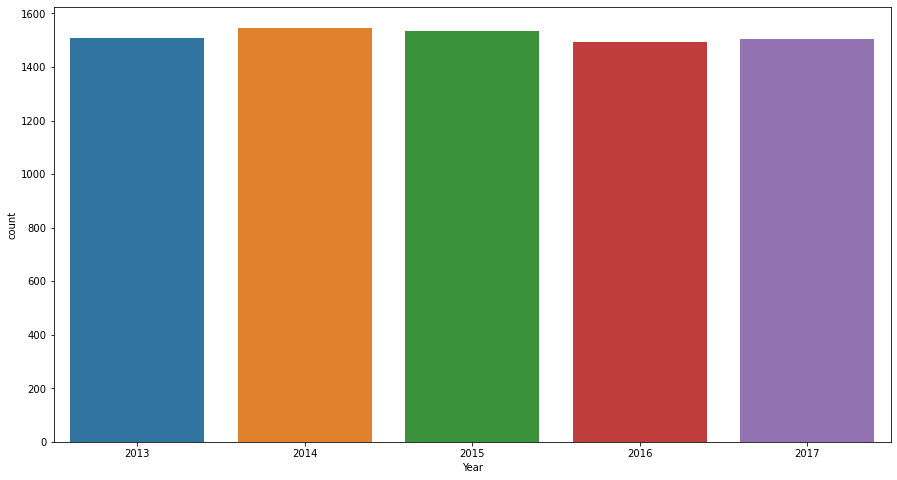

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(x="Year",data=temperature)

AS YOU CAN SEE THAT THERE ARE MORE NUMBER OF 2014 AND 2015 DATASET PRESENT FOR THIS TEMPERATURE FORECAST DATASET

<AxesSubplot:xlabel='Month', ylabel='count'>

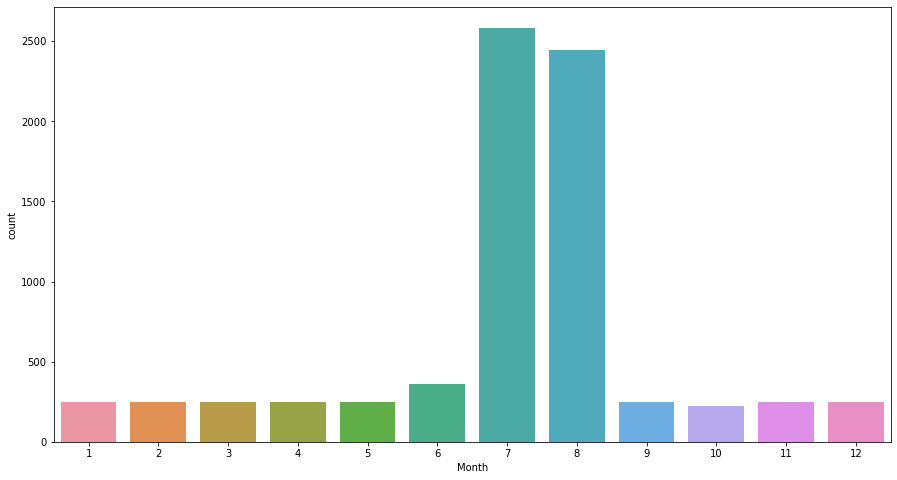

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(x="Month",data=temperature)

AS WE CAN SEE PERFECTLY THAT IN THE 7 AND 8 MONTH THE FORECAST FOR TEMPERATURE IS COMAPRITIVELY HIGHER THAN ANY OTHER MONTH OF THE YEAR MAYBE THERE IS SO MUCH CHANGE IN THE 7 AND 8 MONHT OF THE YEAR WHICH WE HAVE TO FIND OUT 

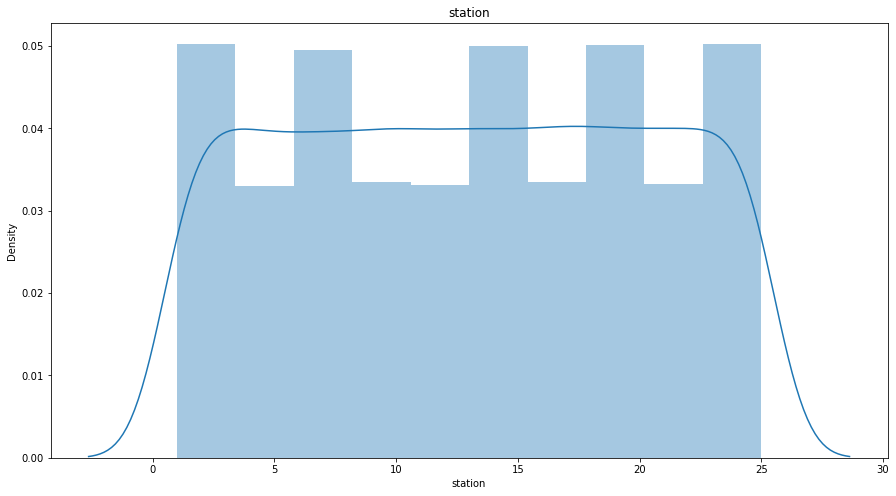

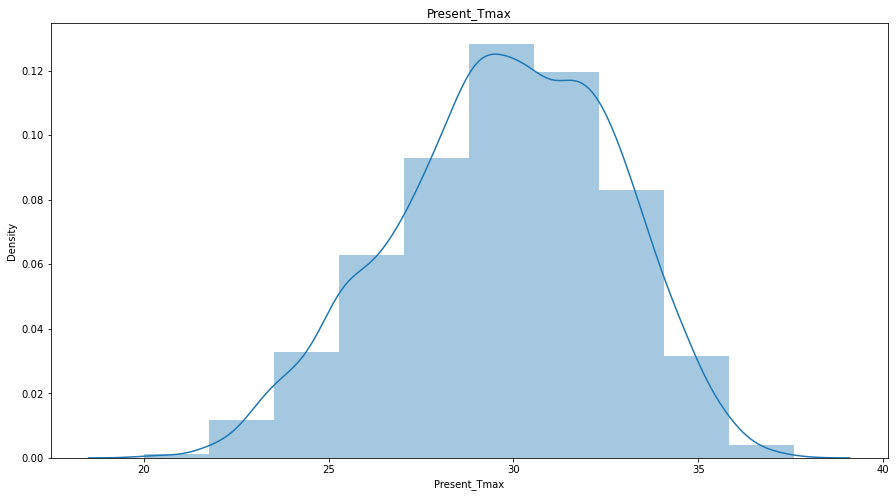

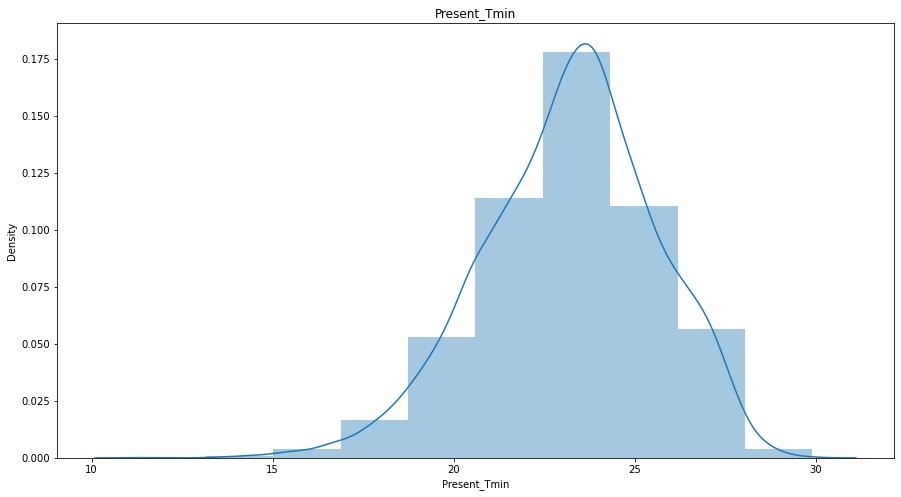

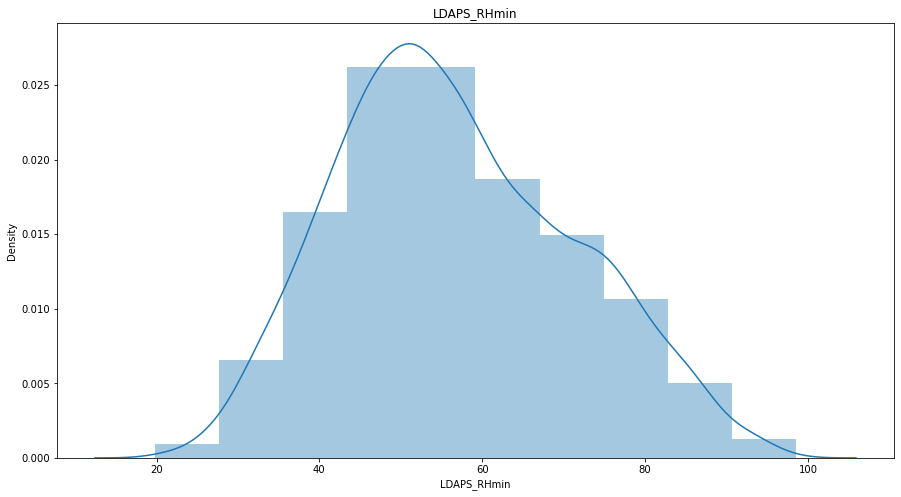

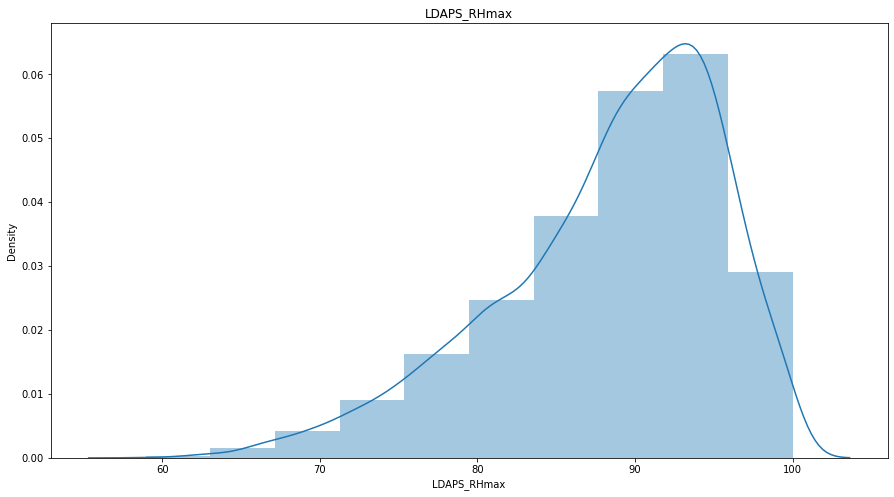

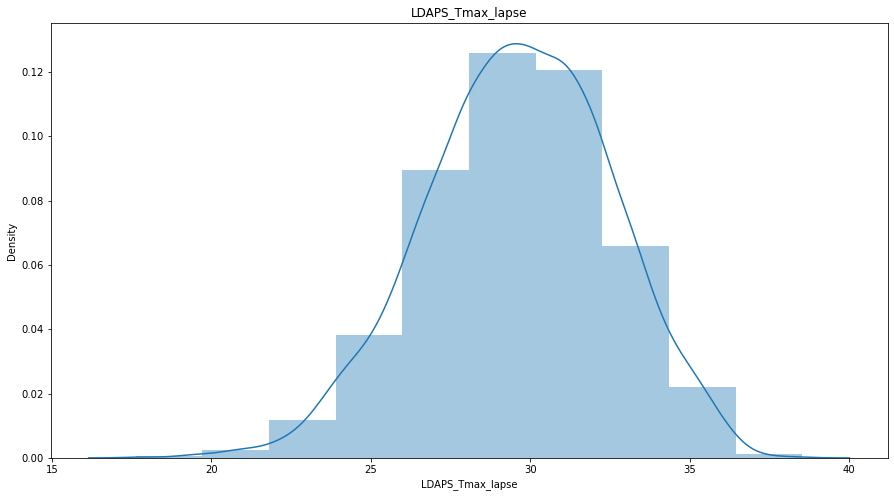

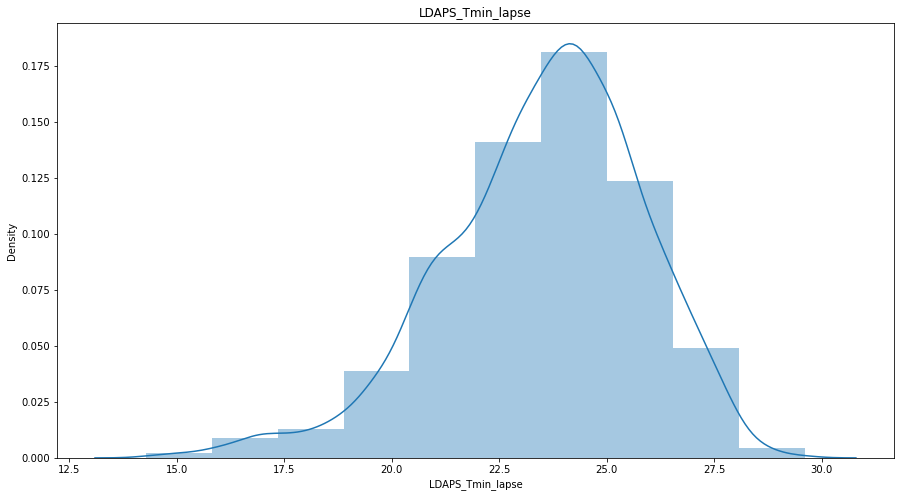

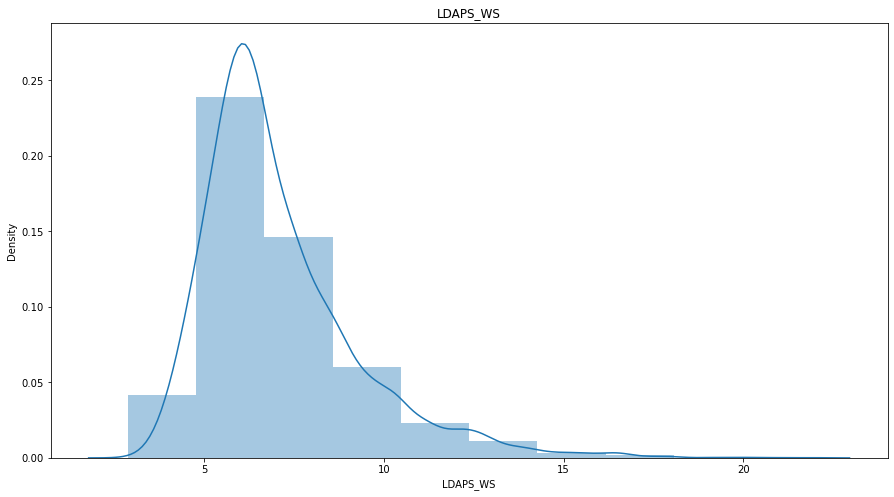

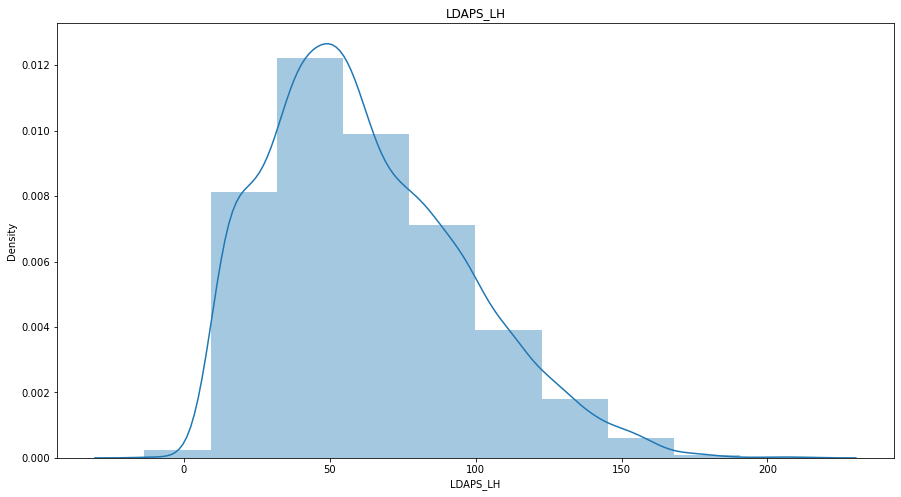

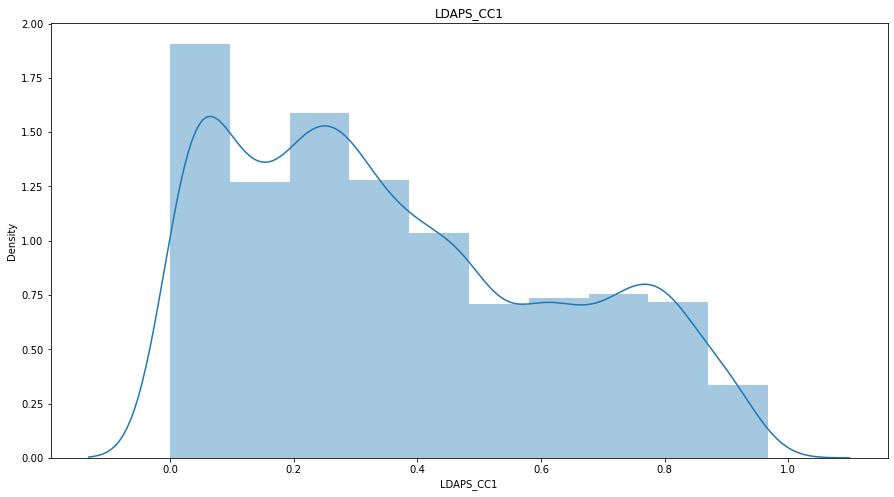

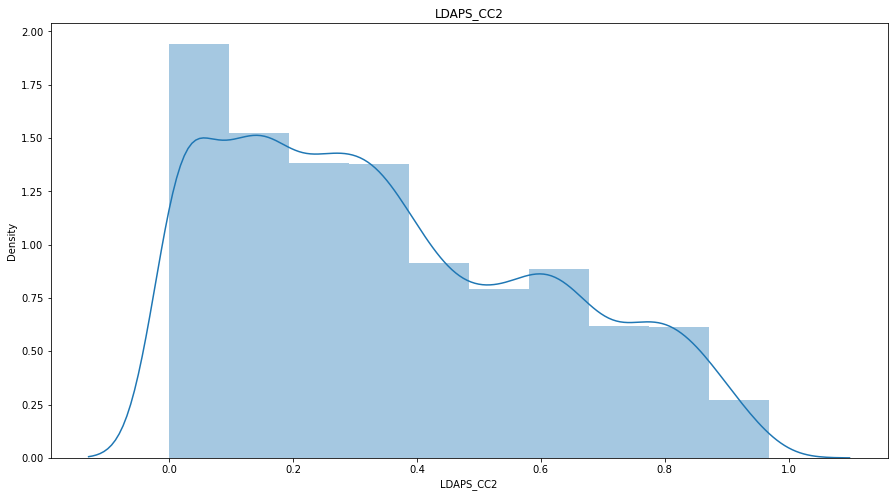

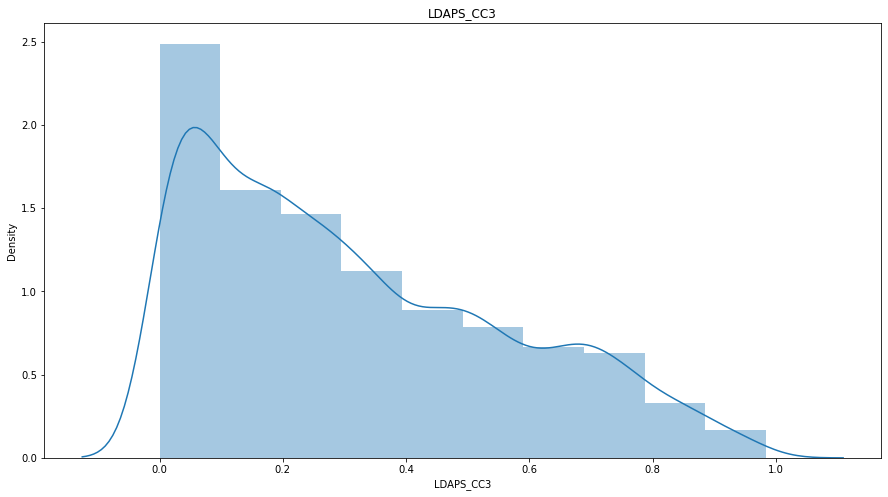

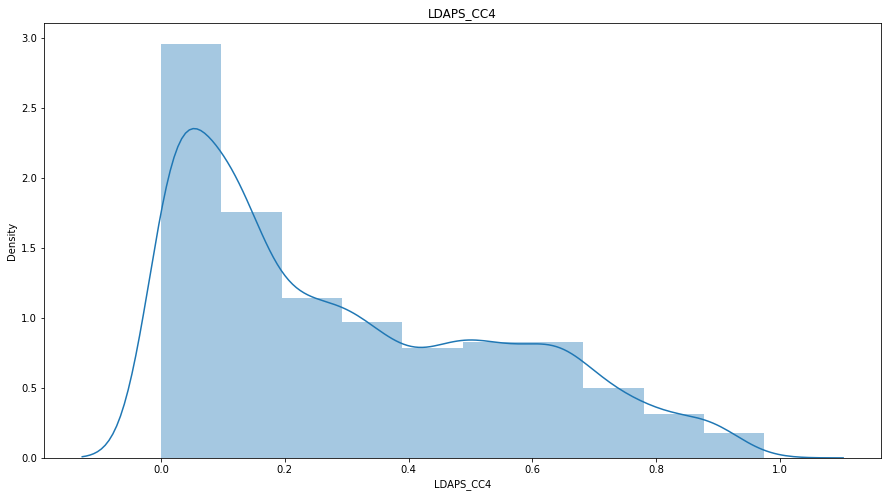

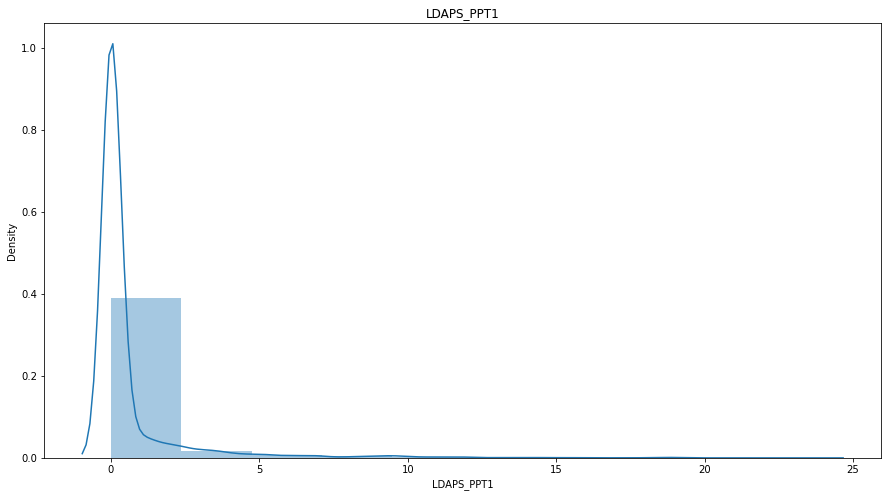

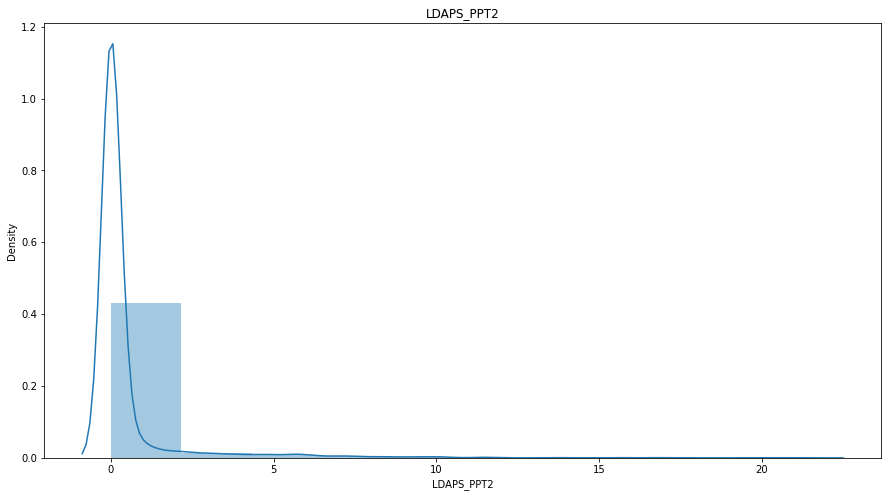

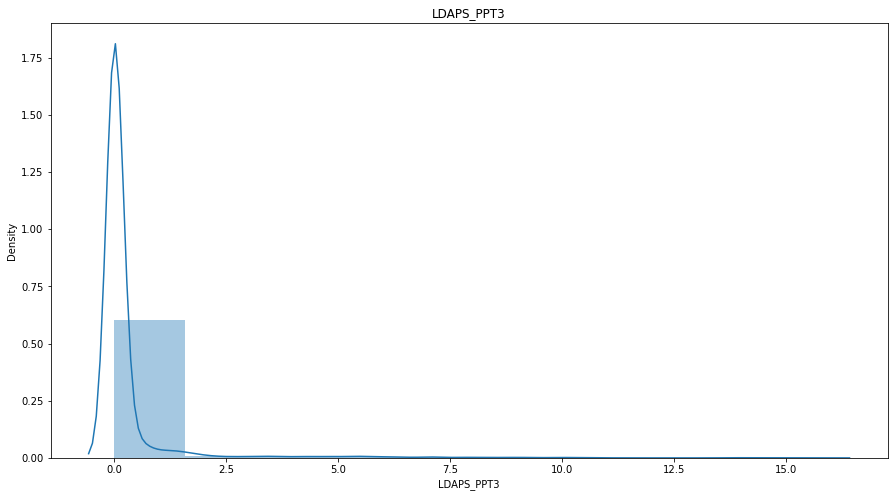

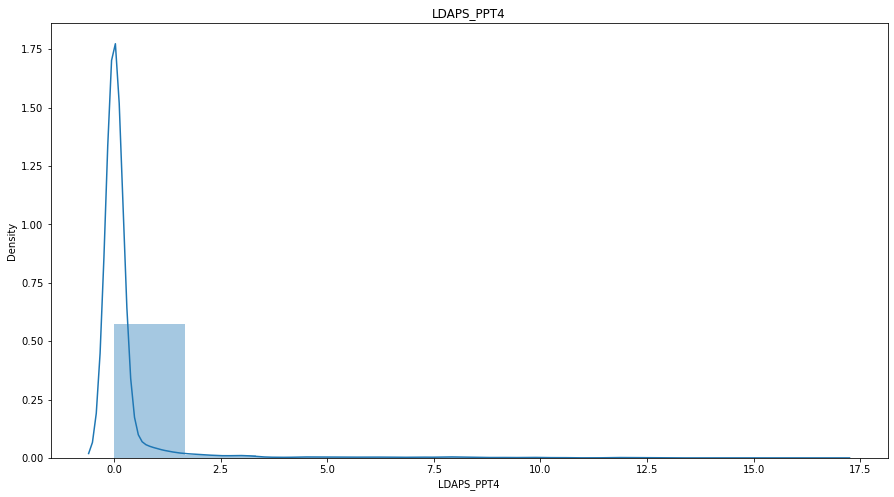

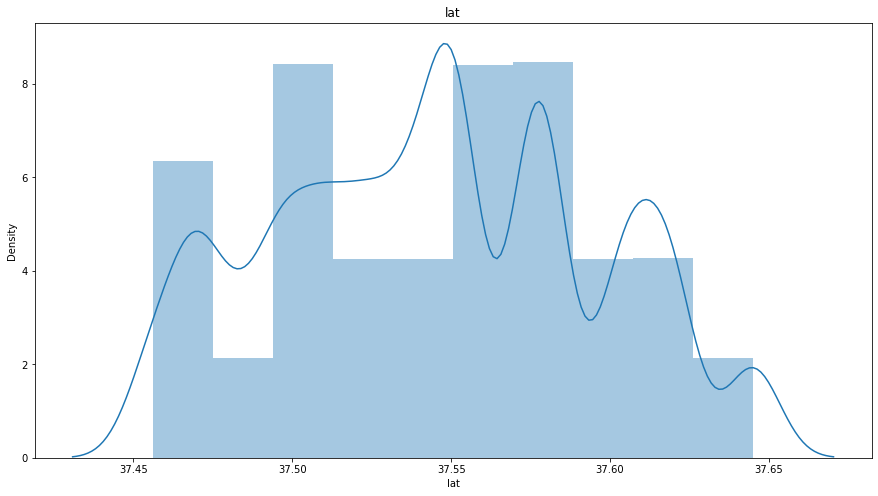

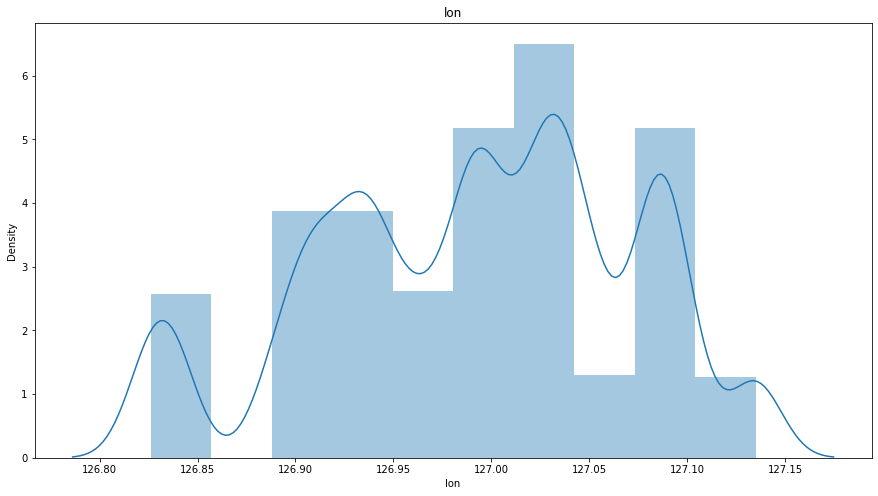

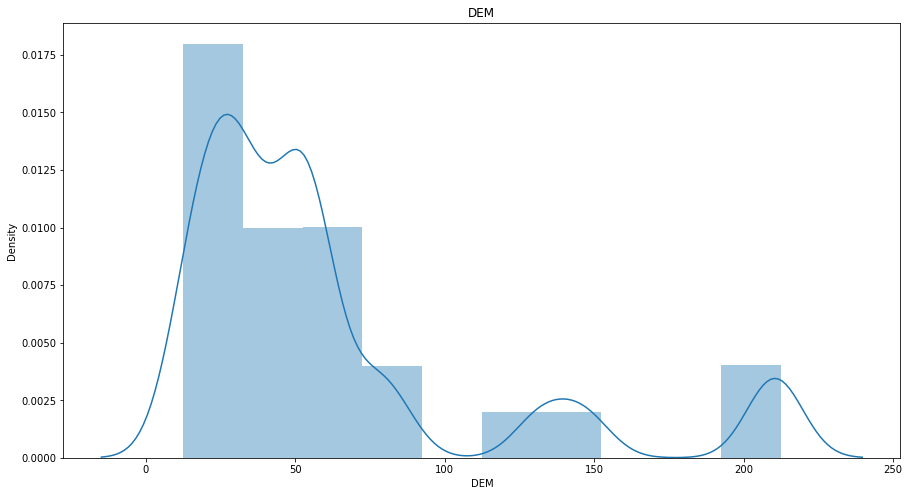

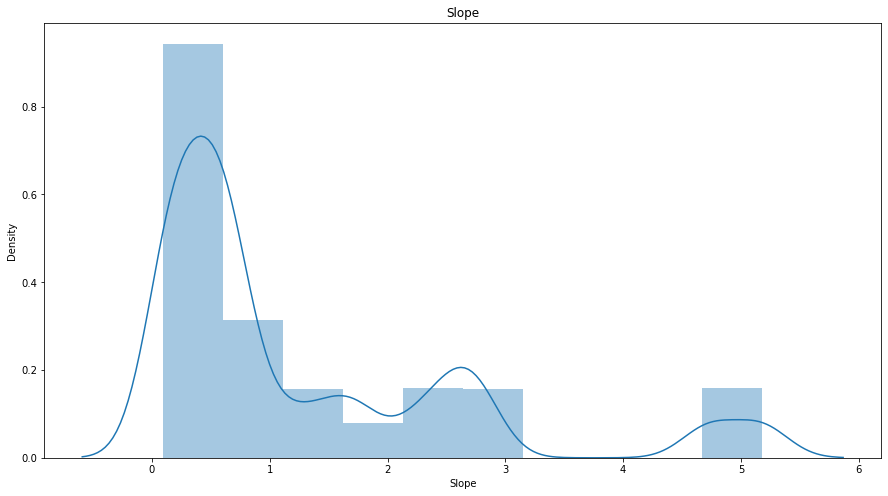

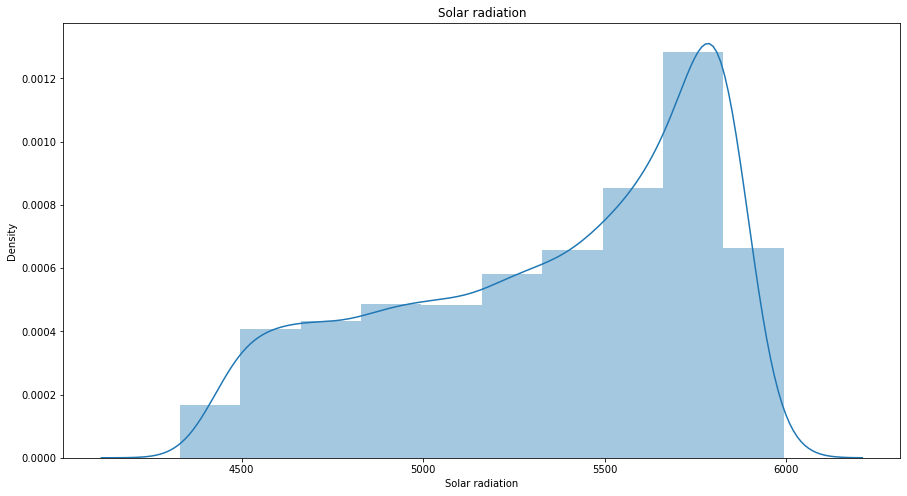

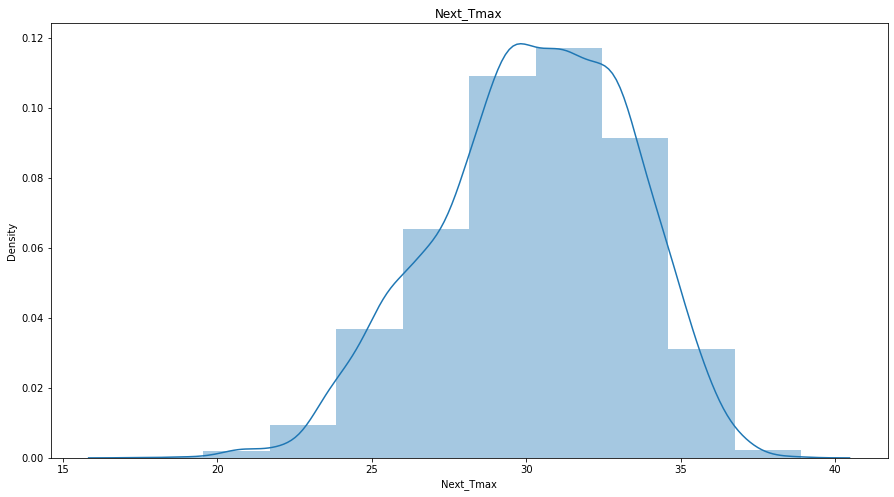

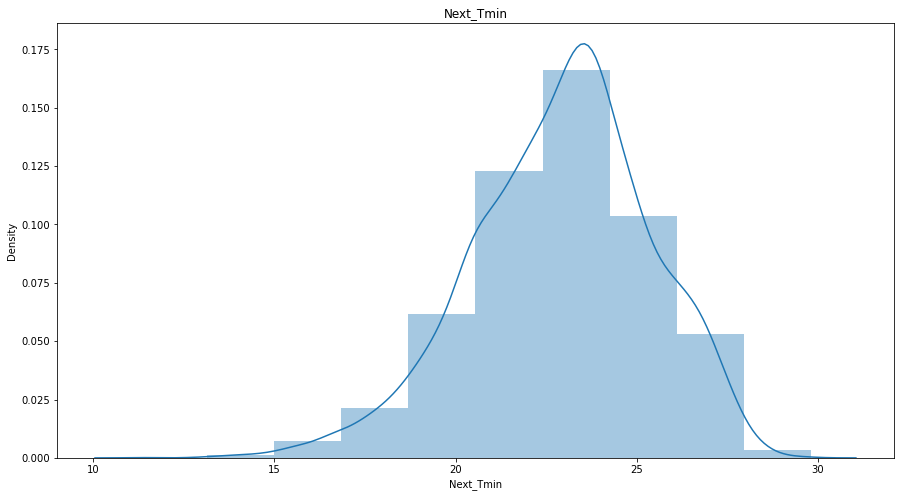

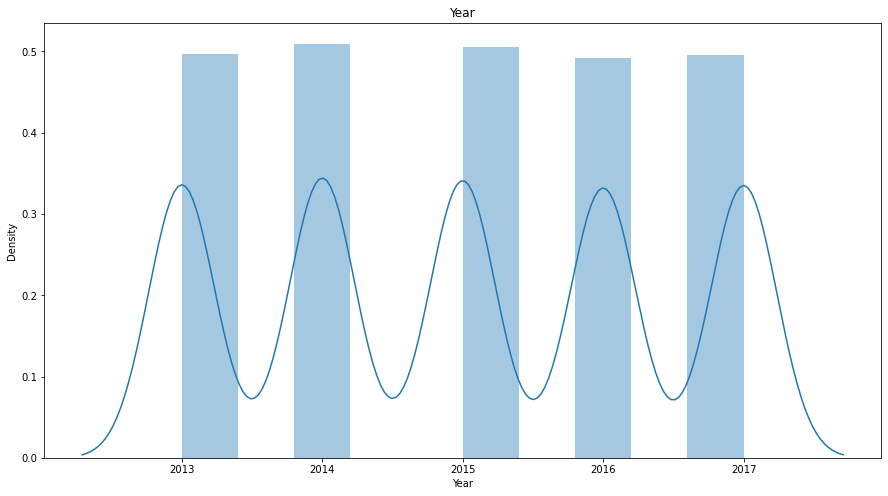

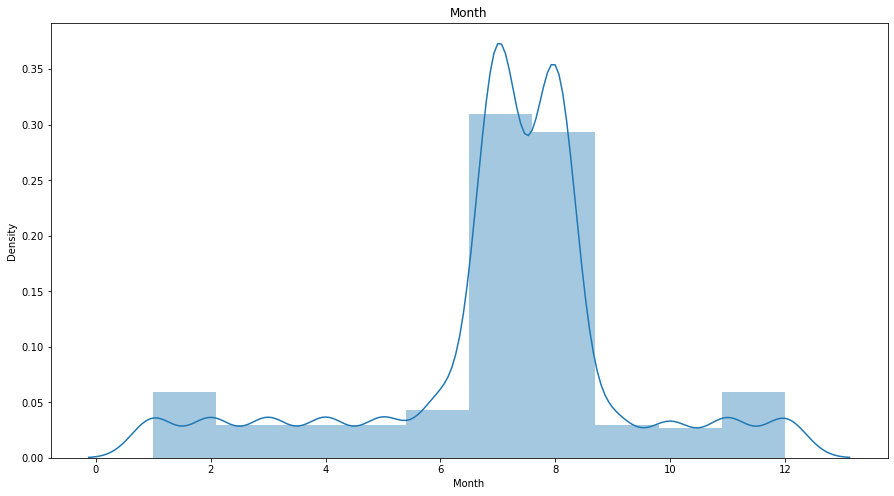

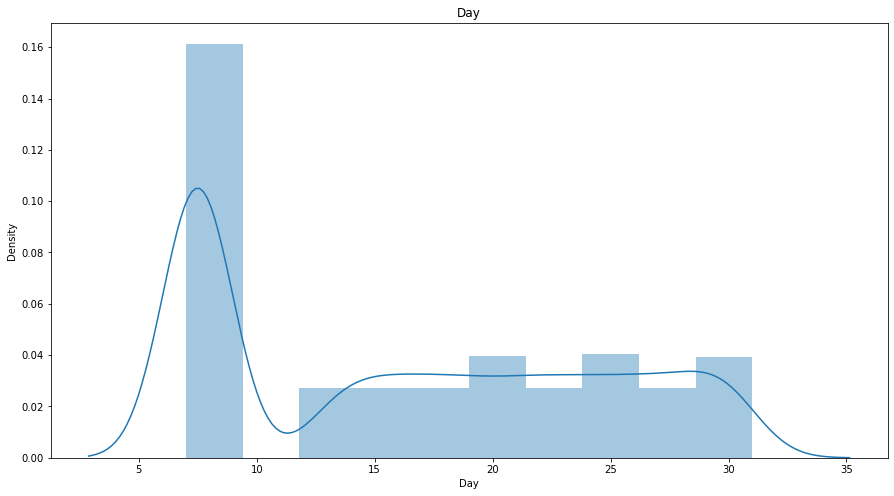

In [62]:
for i in temperature.columns:                                
    plt.figure(figsize = (15, 8))
    sns.distplot(temperature[i], bins = 10)
    plt.title(i)
    plt.show()

# BIVARIATE ANALYSIS 

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

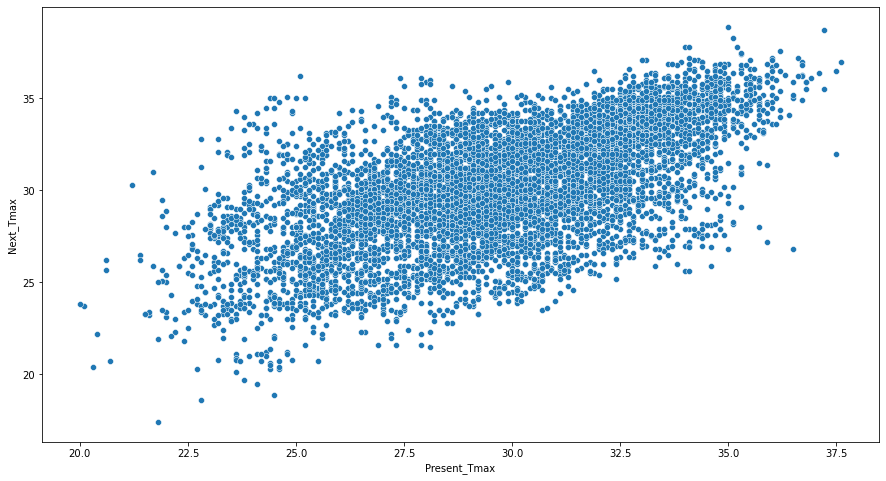

In [32]:
# LET'S TO SEE SOME RWLATIONSHIP BETWEEN VARIOUS FEATURE THROUGH GRAPH
plt.figure(figsize=(15,8))
sns.scatterplot(x="Present_Tmax",y="Next_Tmax",data=temperature)

AS YOU CAN CLEALRY SEE THAT IF THE PRESENT TEMPERATURE OF THE SEOUL HAS IS BETWEEN THE 25C TO 37.5 THE NEXT DAY TEMPERATURE ALSO IS BETWEEN THE 25 TO MORE THAN 35 AS WE CAN CLEALRY SEE THAT THERE IS LINEAR RELATIONSHIP BETWEEN THESE TWO FEATUER 
AS YOU CAN SEE THE PRESENT T_MAX INCREASING THE NEXT DAY T_MAX ALSO INCREASES IN LINEAR LINE 

<AxesSubplot:xlabel='Present_Tmax', ylabel='LDAPS_RHmax'>

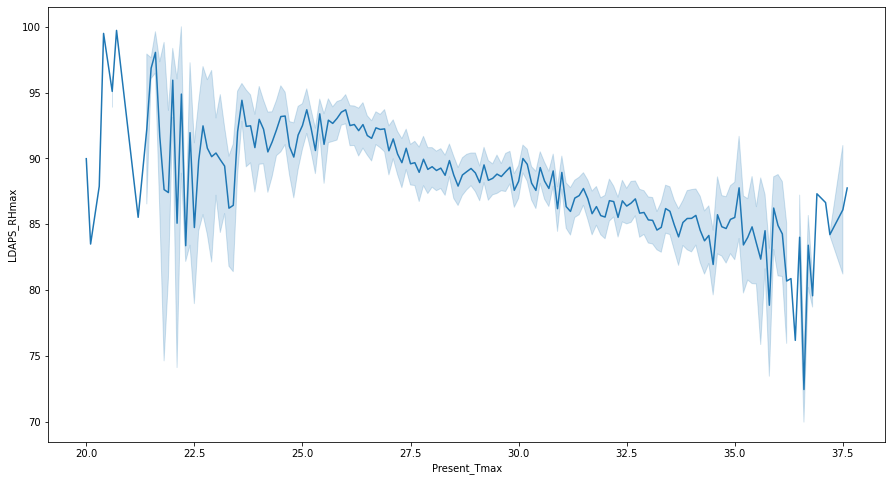

In [33]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Present_Tmax",y="LDAPS_RHmax",data=temperature)

PERFECT RELATIONSHIP WE CAN OBSERVE FROM HERE :-
1. YOU CAN CLEALY SEE THAT IF THE PRESENT DAY TEMPERATURE IS BETWEEN 20 TO 22.5 THE PERCETANGE OF MAXIMUM RELATIVE HUMIDITY IS BETWEEN THE 85% TO ALMOST 98% WHICH SHOWS THAT LOWER TEMPERATURE REGION WILL HAVE HIGHER HUMIDIYT 

2. WE CAN ALSO SEE THAT IF PRESENT DAY TEMPEARTURE IS HIGH ALMOST FROM 30 TO 36 YOU CAN SEE THE RELATIVE HUMIDITY CONTINOUSLY DECREASING FROM 88% TO AQLMOST AS LOW AS 72% WHICH IS SIGN IFICANT DROP

SO IT IS CLEAR THAT RELATIVE HUMIDITY IS INVERSELY PROPORTIONAL TO TEMPERATURE THE REGION WHICH HAVE LOWER RELATIVE HUMIDITY CERATINLY WILL HAVE HIGHER TEMPEARTURE AT THAT TIME 

In [59]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [60]:
import folium
from folium.plugins import MarkerCluster

In [109]:
mean_lat = temperature['lat'].mean()
mean_lon = temperature['lon'].mean()
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)
marker_cluster = MarkerCluster().add_to(m)
high_radiation_threshold = temperature['Solar radiation'].quantile(0.75) 
for index, row in temperature.iterrows():
    if row['Solar radiation'] > high_radiation_threshold:
        folium.Marker([row['lat'], row['lon']], popup=f"Station: {row['station']}").add_to(m)


AS YOU CAN THESE ARE THE AREAS WHERE WE CAN SEE THERE ARE THE AREAS WHERE SOLAR RADIATION WAS HIGH MAINLY THE LATTITUDE AN LONGITUDE IN THE DATSET ARE OF THESE AREA AND WE CAN SEE THAT THE MARKER WITH DARL COLOR RECIVE HIGHER SOLAR RADIATION AND THAT PLACE MOST LIKELY TO BE HAVE HIGHER PRESENT DAY TEMPERATURE

<Figure size 1080x576 with 0 Axes>

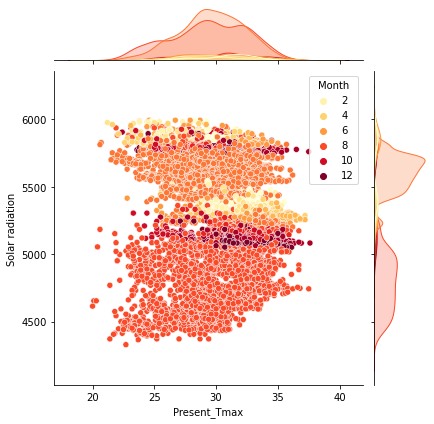

In [34]:
plt.figure(figsize=(15,8))
sns.jointplot(x="Present_Tmax",y="Solar radiation",hue='Month',data=temperature,palette='YlOrRd')

AS WE CAN SEE THAT WHY 7, 8 MONTH OF THE SEOUL HAVE HIGHEST TEMPERATURE AND MORE NUMBER OF DATA THEN ANY OTHER MONHT BECAUSE:-
1. THESE MONTH RECIVES HIGHEST EVER SOLAR RADITION RANGE FROM 5500 TO 6000 WHICH IS VERY HIGH MAYBE THIS IS THE MONTH OF THE SUMMER 

2. WE CAN ALSO SEE FROM 7 MONTH TO 8 MONTH TO 9 MONTH THE TEMPERATURE WAS IN THE RANGE 28 TO 35 IN WHICH AVERAGE MAXIMUM TEMPERATURE ACCORDING TO GRAPH IS 30

<Figure size 1080x576 with 0 Axes>

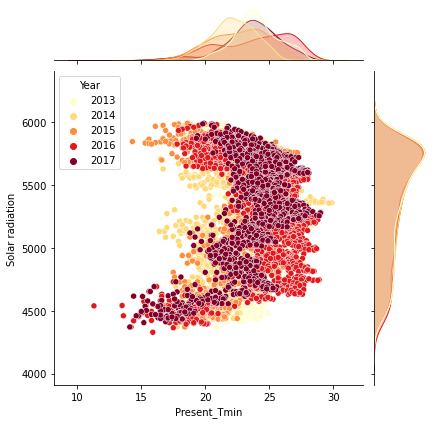

In [35]:
plt.figure(figsize=(15,8))
sns.jointplot(x="Present_Tmin",y="Solar radiation",hue='Year',data=temperature,palette='YlOrRd')

WE CAN SEE THE MINIMUM TEMPERATURE WHICH RECODED MAXIMUM IN THE YEAR 2016 , 2015 AS COMPARED TO ANY OTHER YEAR WHICH MEAN THESE YEAR ARE SLIGHTLY COOLER THAN OTHER YEAR FOR THAT AREA

WHERE AS AVERAGE MINIMUM TEMPERATURE IN
2013 WAS MIMIMUM UPTO 23,
FOR THE YEAR 2017 24 
FOR 2014 WAS ALSO 24 
FOR 2016 WAS MORE THAN OR EQUAL 25 OR 28 

SO FROM THIS WE CAN SEE THAT AVERAGE MIN TEMP WAS HIGH UPTO 25 TO 28 

WE CAN ALSO SEE THAT EACH YEAR THE SOLAR RADIATION WAS CONSTANT NOT MUCH BIGGER DIFFERNCE 

<AxesSubplot:xlabel='Day', ylabel='Month'>

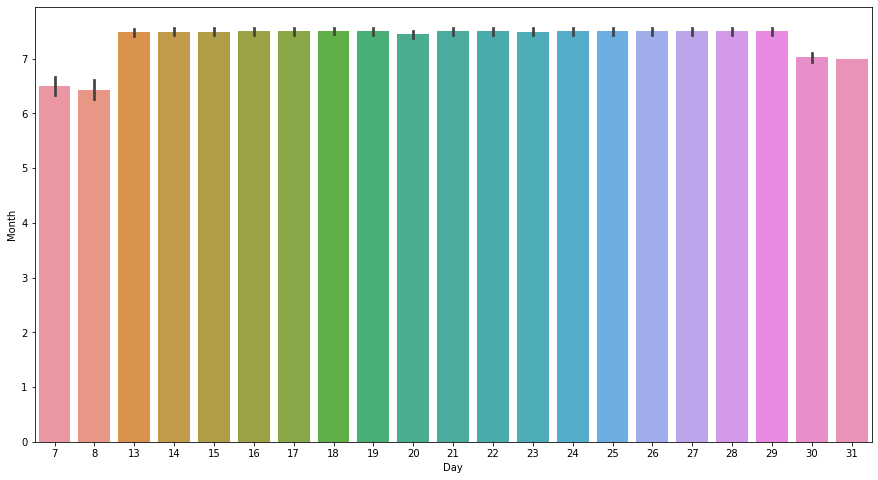

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(x="Day",y="Month",data=temperature)

AS PERFECT THIS DATA NOW CLEARLY SHOW THAT IN ALL THESE MONHT FROM 1 TO 6 NO INCRESES IN THE DATASET BUT SUDDENLY INCREASE IN THE 7 TO 9 MONTH AND THE DAY WHERE IT RECORD WAS MORE FROM 13TH TO 29 TH DAY THE TEMPERATURE IS HIGH 

Text(0.5, 1.0, 'Relationship between Present Max Temperature and Cloud Cover')

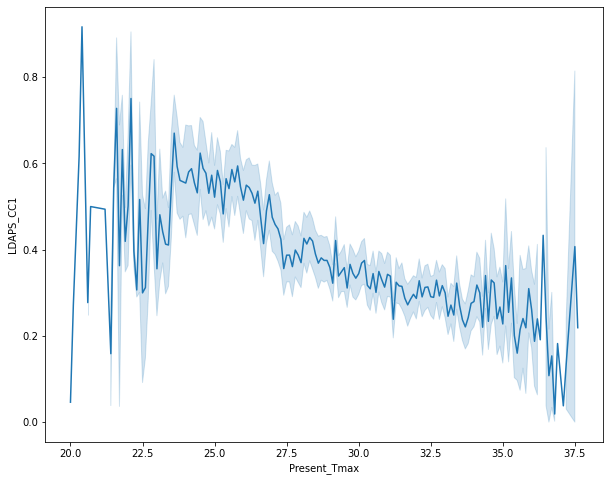

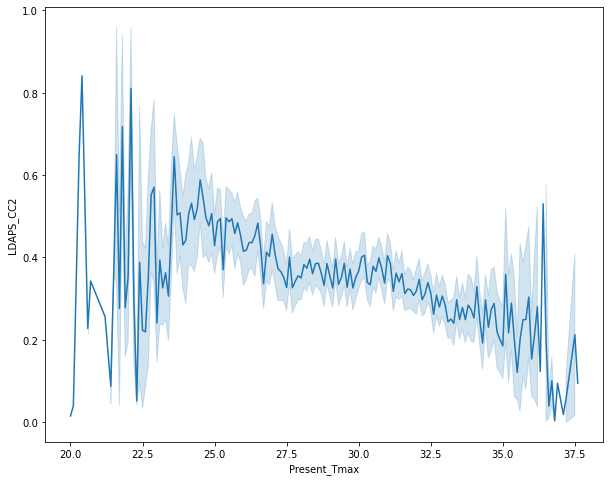

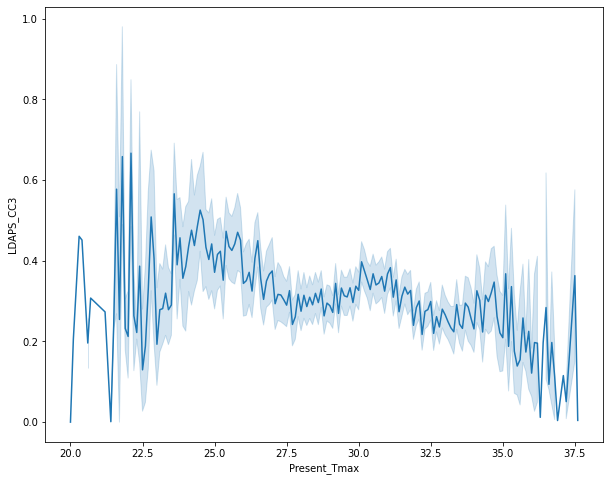

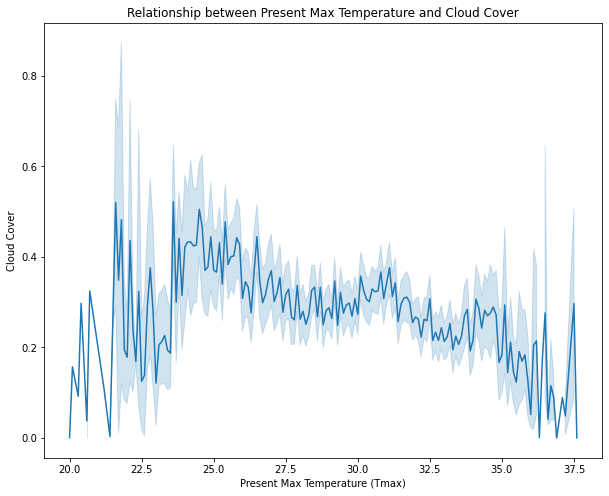

In [37]:
cloud=["LDAPS_CC1","LDAPS_CC2","LDAPS_CC3","LDAPS_CC4"]
for i in cloud:
    plt.figure(figsize=(10,8))
    sns.lineplot(x="Present_Tmax",y=i,data=temperature,palette='YlOrRd')
    
plt.xlabel("Present Max Temperature (Tmax)")
plt.ylabel("Cloud Cover")
plt.title("Relationship between Present Max Temperature and Cloud Cover")

AS WE CAN CLEALRY SEE THAT:
1. IN FIRST GRAPH WHEN THE COULD COVER FOR FIRST (6 HOUR )MORNING WAS HIGHEST ALMOST 80% AND AT THAT TIME TEMPEARTURE WAS ALMOST BETWEEN THE 20 TO 22.5 
2. YOU CAN SEE THAT AS THE CLOUD COVER PERCENTAGE WAS DECREASING THE PERSENT DAY MAXIMUM TEMPEARATURE ALSO VERY HIGH COMPATRE TO OTHER WHEN SLOWLY THE SUN STARTRRISING FROM MORMIMG TO TILL AFTERNOON 

FOR CC2:
FOR NEXT 6 HOUR (AFTERNOON) SESSION :
 AS WE CAN CLEALRY SEE THAT IN CC2 THAT CLOUD COVER WAS ALSO 80% BUT MANY TIMES CLOUD COVER BECOMES UPTO 20% BUT DURING THAT TIME TEMPERATURE WAS AS LOW AS 22.5 
 
FOR CC3:
AS YOU CAN SEE THAT IN CC3 IT IS GENERALLY AFTERNOON TO VENING SESSION EVENIKG SESSION WE CAN CLEALRY SEE THAT MAXIMUM CKOUD PRECENTAGE IS ONLY GOES TO 65 % SO THE TEMPEARTURE ALSO INCRESES BUT AS YOU SEE HWEN TEMPOEARTURE RWACHES TO MAXIMUM 37.5 THE CLOUD PERCENTAGE ALMOIST EQUAL TO 10 % 

FOR CC4 :
FOR THIS SESSION WE CAN SEE THAT IN THIS SESSION THE CLOUDS ARE MIMUMUM UPTO LESS THAN 50 % AS THEY ARE LESS TEMPERATURE IS HIGHB 


FRPM ALL THIS OBSERVATION WE CONCLUDE THAT AS THE NUMBER OF CLOUDS INCRESES THE THE PRESENT TEMPERATURE ALSO DROP IN THE SAME WAY AS COUD SO IT IS MORE LIKE A LINEAR RELATIONSHIP


Text(0.5, 1.0, 'Relationship between Present Max Temperature and preciptation ')

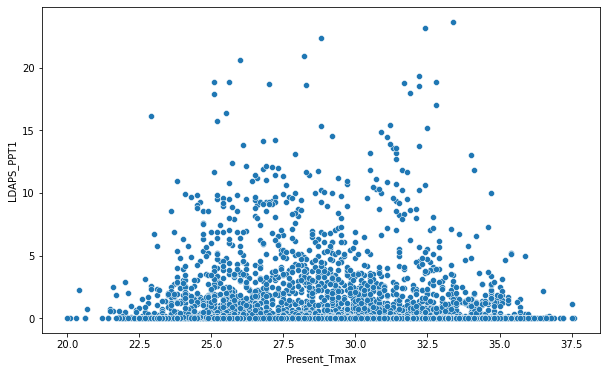

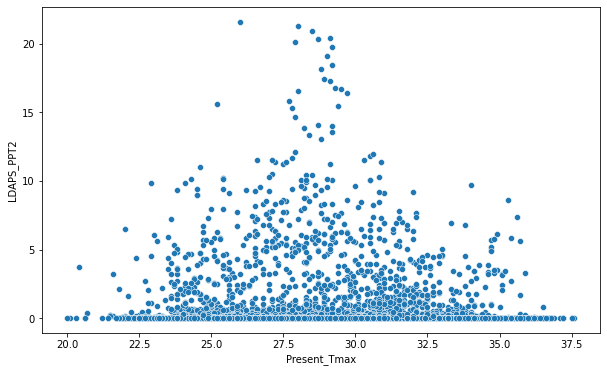

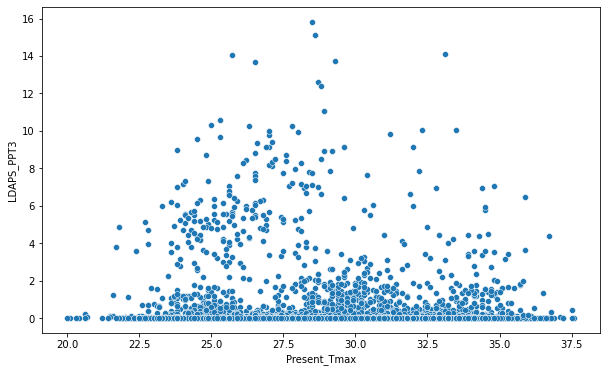

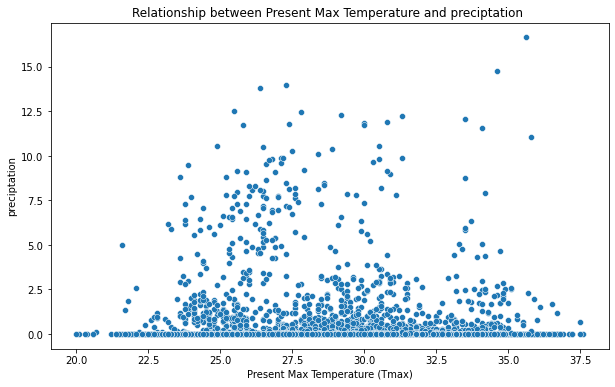

In [40]:
precipitation=["LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"]
for i in precipitation:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x="Present_Tmax",y=i,data=temperature,palette='YlOrRd')
    
plt.xlabel("Present Max Temperature (Tmax)")
plt.ylabel("preciptation")
plt.title("Relationship between Present Max Temperature and preciptation ")

Text(0.5, 1.0, 'Relationship between Present Max Temperature and preciptation ')

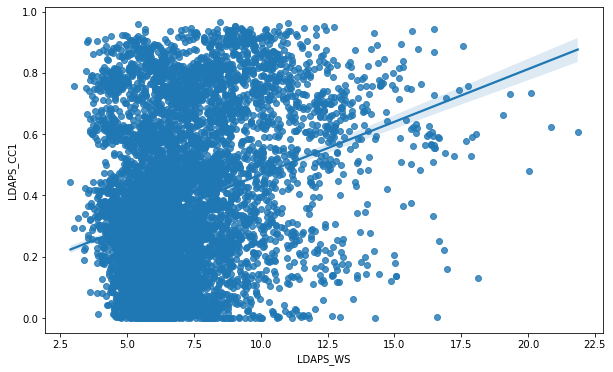

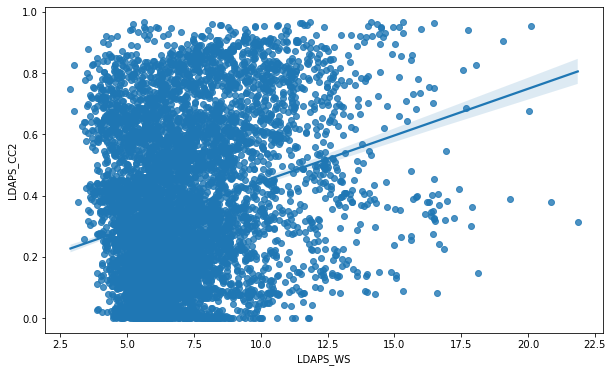

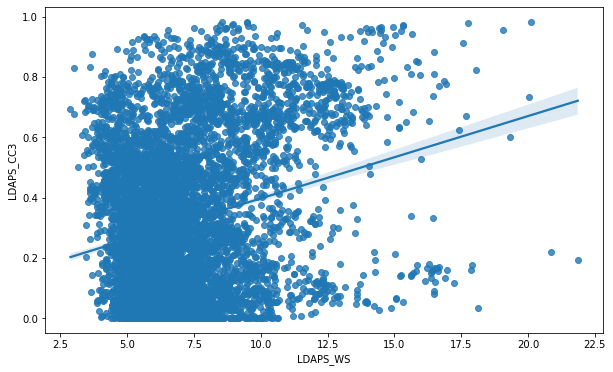

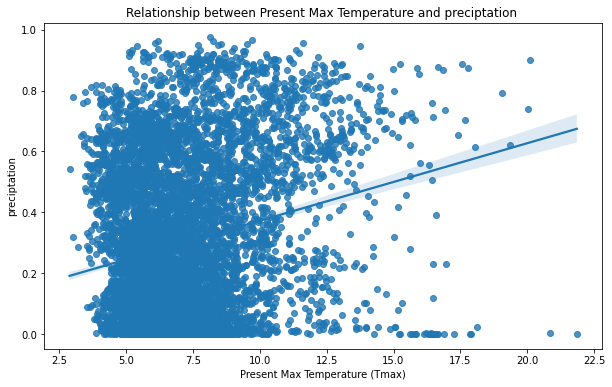

In [40]:
cloud=["LDAPS_CC1","LDAPS_CC2","LDAPS_CC3","LDAPS_CC4"]
for i in cloud:
    plt.figure(figsize=(10,6))
    sns.regplot(x="LDAPS_WS",y=i,data=temperature)
    
plt.xlabel("wind speed (LADPS_WS)")
plt.ylabel("cloud")
plt.title("Relationship between Windspeed LADPS_WS and cloud ")

AS YOU CAN CLEALRY SEE IN ALL THE GRAPG OF CC'S v/S WIND SPEED THAT IF THE SPEED OF THE WIND IS BETWEEN 2.5 TO 10.5 THE DENSITY OF CLOUD IS UPTO 90% DENSE AND WE SEE FROM PREVIOUS GRPAG THAT  HIGHER THE CLOUD DENSITY LOWER THE TEMPERATURE 

AND IF THE WINDSPEED INCREASES FROM 12.5 TO 22.5 YOU CAN CLEARLY SEE THE DENSITY CLOUD OVERT THAT PERIOD IS VERY LESS WHICH MEANS THTA DURING THAT TIME THE TEMPERATURE IS MAXIMUM AND WE FROM PREVIOUS GRPAH AVOU THAT AS WELL 

<AxesSubplot:xlabel='Present_Tmax', ylabel='LDAPS_WS'>

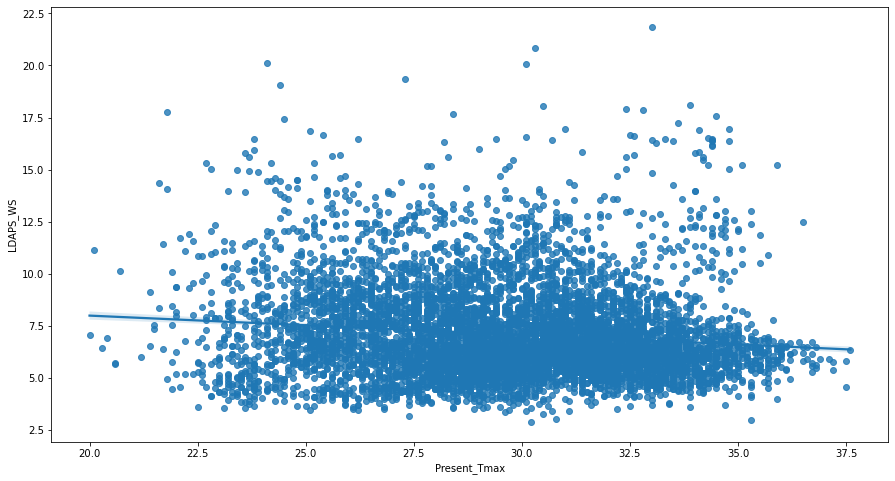

In [54]:
plt.figure(figsize=(15,8))
sns.regplot(x="Present_Tmax",y="LDAPS_WS",data=temperature)

AS WE CAN SEE THAT IN THR GRAPH THAT THERE IS LINEAR DECREASES IN THE TEMPERATURE AS THE WIND SPEED INCREASES WE CANS SEE THAT WHEN WINS SPEED WAS HIGHER SIDE BETWEEN OR AOVE 7.5 TO 12.5 TEMPEARTURE BUT WHEN THE WIND SPEED INCRESES THE TEPREARTURE ALSO INCREASES  

<AxesSubplot:xlabel='Present_Tmin', ylabel='Slope'>

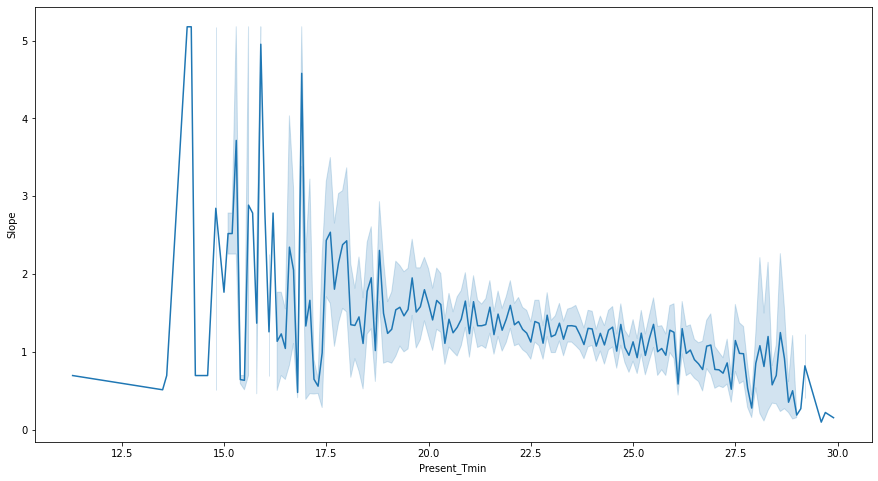

In [57]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Present_Tmin",y="Slope",data=temperature)

AS TOU CAN CLAELY SEE THAT AS SLOPE INCFESE OR HIGHER THE TEMPERATURE ALSO MINIMUMM AMD AS THE SLOOE INCREASES THE TEMPERATURE ALSO INCRESES IT MEANS THERE IS LINEAR RELATIONSHIP BETWEEN THE PRESENT_tMIN AN SLOPE

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

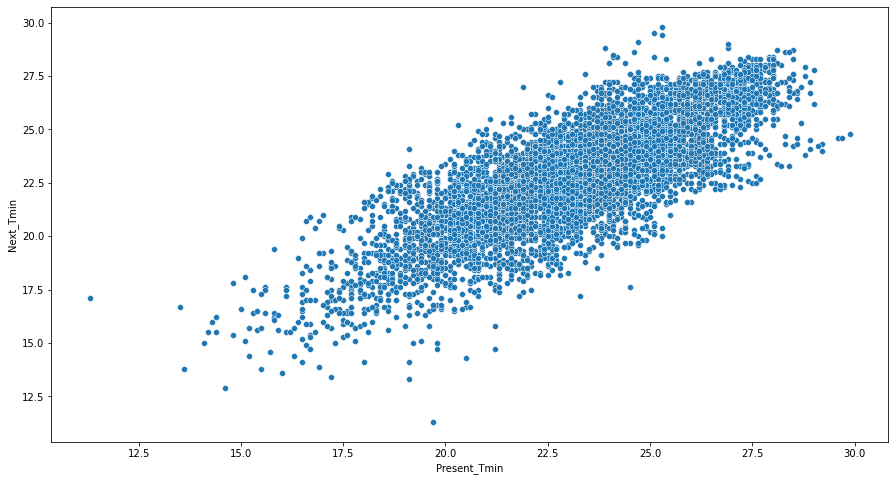

In [58]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Present_Tmin",y="Next_Tmin",data=temperature)

AS YOU CAN CLEALRY SEE THAT THERE IS LINEAR REALTIONSHIP BETWEEN THE PRESENT_TMIN AND NEXT_TMIN IT MEANS WHATEVER FEATURE AFFECT THE PRESENT DAY TEMPEARTURE IT WIL ALSP EFFECT THE NEXT_DAT TEMPEARTURE BEACUSE OF LINAR RELATIONSHIP
SAME AS FOR PRESENT_TMAX V/S NEXT_TMAX 

FROM ALL GTHE ABOVE GRAPG WE CAN CLEALRY SEE THAT IF ANY FEATURE WHICH DIRECTLY OR INDIRECTLY AFFECT THE PRESENT DAY MINIMUM OR MAXIMUM TEMPEARTURE IT ALSO AFF3ECT THE NEXT DAY MIMNIMUM AND MAXIMUM TEMPERATURE BEACAUSE OF LINEAR REALTIONSHHIOP WE ALREDY 

# NOW WE DO SOME PREPROCESSING

# OUTLIERS 

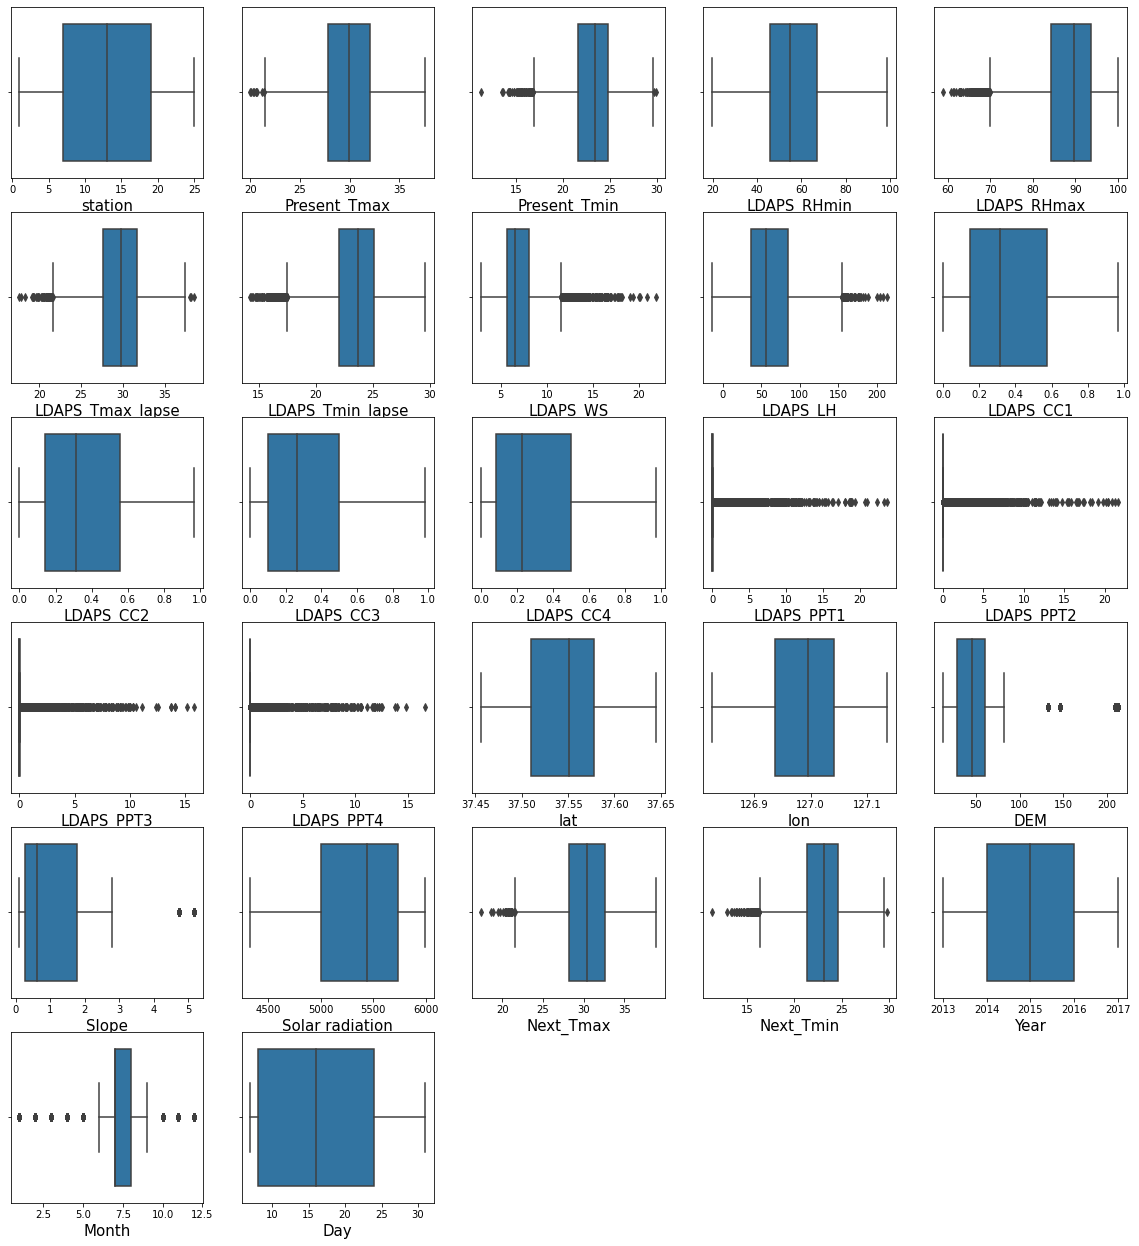

In [27]:
# LET'S CHECK OUTLIERS IF THERE IS ANY OUTLIERS PRESENT IN THE DATSET 
plt.figure(figsize=(20,22))
plotnumber=1
for feature in temperature.columns:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.boxplot(temperature[feature])
        plt.xlabel(feature,fontsize=15)
    plotnumber+=1
plt.show()

AS YOU CAN SEE MANY COLUMNS HAVE OUTLIERS PRESENT IN THEM WE HAVE TO REMOVE THAT OUTLIERS FROM THE DATSET WE CAN USE Z- SCORE TO REMOVE THHAT OR IQR MANY FEATURE HAVE OUTLIERS LET REMOVE IT 

# Z- SCORE

In [28]:
# LET'S USE  Z- SCORE TO REMOVE THE OUTLIERS
feature_with_outliers= temperature[["Month","Next_Tmax","Next_Tmin","Solar radiation","Slope","DEM","Present_Tmax","Present_Tmin","LDAPS_RHmax","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_LH","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"]]

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(feature_with_outliers))

In [30]:
z

Month  Next_Tmax  Next_Tmin  Solar radiation     Slope       DEM  \
0     0.476369   0.366861   0.689265         1.510565  1.111162  2.769091   
1     0.476369   0.083068   0.165513         1.222997  0.543220  0.315828   
2     0.476369   0.275895   0.398527         1.209602  0.723891  0.526719   
3     0.476369   0.468721   0.559681         1.194265  0.928888  0.298272   
4     0.476369   0.308032   0.165513         1.200286  0.549485  0.494848   
...        ...        ...        ...              ...       ...       ...   
7745  0.415596   0.848928   2.099366         2.065599  0.500966  0.655747   
7746  0.415596   0.720377   2.341098         2.098689  0.820711  0.735482   
7747  0.415596   0.623964   1.938212         2.095175  0.804538  0.852919   
7748  0.415596   0.527550   1.656192         2.106671  0.755800  0.821476   
7749  0.415596   0.784652   2.220232         2.076487  0.720103  0.779341   

      Present_Tmax  Present_Tmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0         0.353318      0.748029     0.382768          0.525269   
1         0.725138      0.664721     0.311697          0.078334   
2         0.624033      0.043400     0.609425          0.160080   
3         0.758840      0.085054     1.128335          0.028710   
4         0.556630      0.539758     0.249244          0.171981   
...            ...           ...          ...               ...   
7745      2.240616      2.247578     1.402898          0.614083   
7746      2.442826      2.414195     0.648815          0.990460   
7747      2.173212      2.539157     1.318376          1.110333   
7748      2.173212      2.289232     1.537141          0.886737   
7749      2.206914      2.414195     1.544257          0.570995   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_PPT1  LDAPS_PPT2  \
0             0.215525  0.126423  0.206603    0.305589    0.275777   
1             0.223368  0.644133  0.313359    0.305589    0.275777   
2             0.449896  0.439100  1.244497    0.305589    0.275777   
3             0.079238  0.663353  0.096026    0.305589    0.275777   
4             0.010803  0.624327  1.349989    0.305589    0.275777   
...                ...       ...       ...         ...         ...   
7745          2.223667  0.225479  1.569844    0.305589    0.275777   
7746          2.432415  0.609132  0.583486    0.305589    0.275777   
7747          2.021883  0.434188  0.283984    0.305589    0.275777   
7748          2.039881  0.253241  0.452772    0.305589    0.275777   
7749          2.129768  0.089654  1.585402    0.305589    0.275777   

      LDAPS_PPT3  LDAPS_PPT4  
0       0.239969    0.224971  
1       0.239969    0.224971  
2       0.239969    0.224971  
3       0.239969    0.224971  
4       0.239969    0.224971  
...          ...         ...  
7745    0.239969    0.224971  
7746    0.239969    0.224971  
7747    0.239969    0.224971  
7748    0.239969    0.224971  
7749    0.239969    0.224971  

[7588 rows x 17 columns]

AS YOU CAN SEE THESE DATASET CONTAIN ALL THE OULIERS WHICH WE HAV TO REMOVE IT FROM THE DATSET WHICH WE HAVE FOUNDED YET 

In [31]:
# We have assumed the Z-score threshold < 3 will have no outliers 
temperature_new=temperature[(z<3).all(axis=1)]

In [32]:
temperature_new

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.203896  1.616969e-01   0.130928         0.0         0.0         0.0   
1      0.251771  1.594441e-01   0.127727         0.0         0.0         0.0   
2      0.257469  2.040915e-01   0.142125         0.0         0.0         0.0   
3      0.226002  1.611574e-01   0.134249         0.0         0.0         0.0   
4      0.249995  1.788925e-01   0.170021         0.0         0.0         0.0   
...         ...           ...        ...         ...         ...         ...   
7745   0.030169  0.000000e+00   0.004380         0.0         0.0         0.0   
7746   0.024518  5.850000e-07   0.017678         0.0         0.0         0.0   
7747   0.081035  0.000000e+00   0.000000         0.0         0.0         0.0   
7748   0.074962  0.000000e+00   0.000000         0.0         0.0         0.0   
7749   0.059869  0.000000e+00   0.000796         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  \
0            0.0  37.6046  126.991  212.3350  2.7850      5992.895996   
1            0.0  37.6046  127.032   44.7624  0.5141      5869.312500   
2            0.0  37.5776  127.058   33.3068  0.2661      5863.555664   
3            0.0  37.6450  127.022   45.7160  2.5348      5856.964844   
4            0.0  37.5507  127.135   35.0380  0.5055      5859.552246   
...          ...      ...      ...       ...     ...              ...   
7745         0.0  37.5507  127.040   26.2980  0.5721      4456.024414   
7746         0.0  37.5102  127.086   21.9668  0.1332      4441.803711   
7747         0.0  37.5372  126.891   15.5876  0.1554      4443.313965   
7748         0.0  37.5237  126.909   17.2956  0.2223      4438.373535   
7749         0.0  37.5237  126.970   19.5844  0.2713      4451.345215   

      Next_Tmax  Next_Tmin  Year  Month  Day  
0          29.1       21.2  2013      6   30  
1          30.5       22.5  2013      6   30  
2          31.1       23.9  2013      6   30  
3          31.7       24.3  2013      6   30  
4          31.2       22.5  2013      6   30  
...         ...        ...   ...    ...  ...  
7745       27.6       17.7  2017      8   30  
7746       28.

AS WE CAN SEE THAT THESE DATASET CONATIN ALL THE ELEMNETS WHICH DOSEN;T HAVE OULIERS PRESENT IN GTHE DATASET OR THE DATASET IN WHICH WE HAVE REMOVE THE OUTLIERS NOW OUR DATASET IS READY TO USE  

# SKWENESS

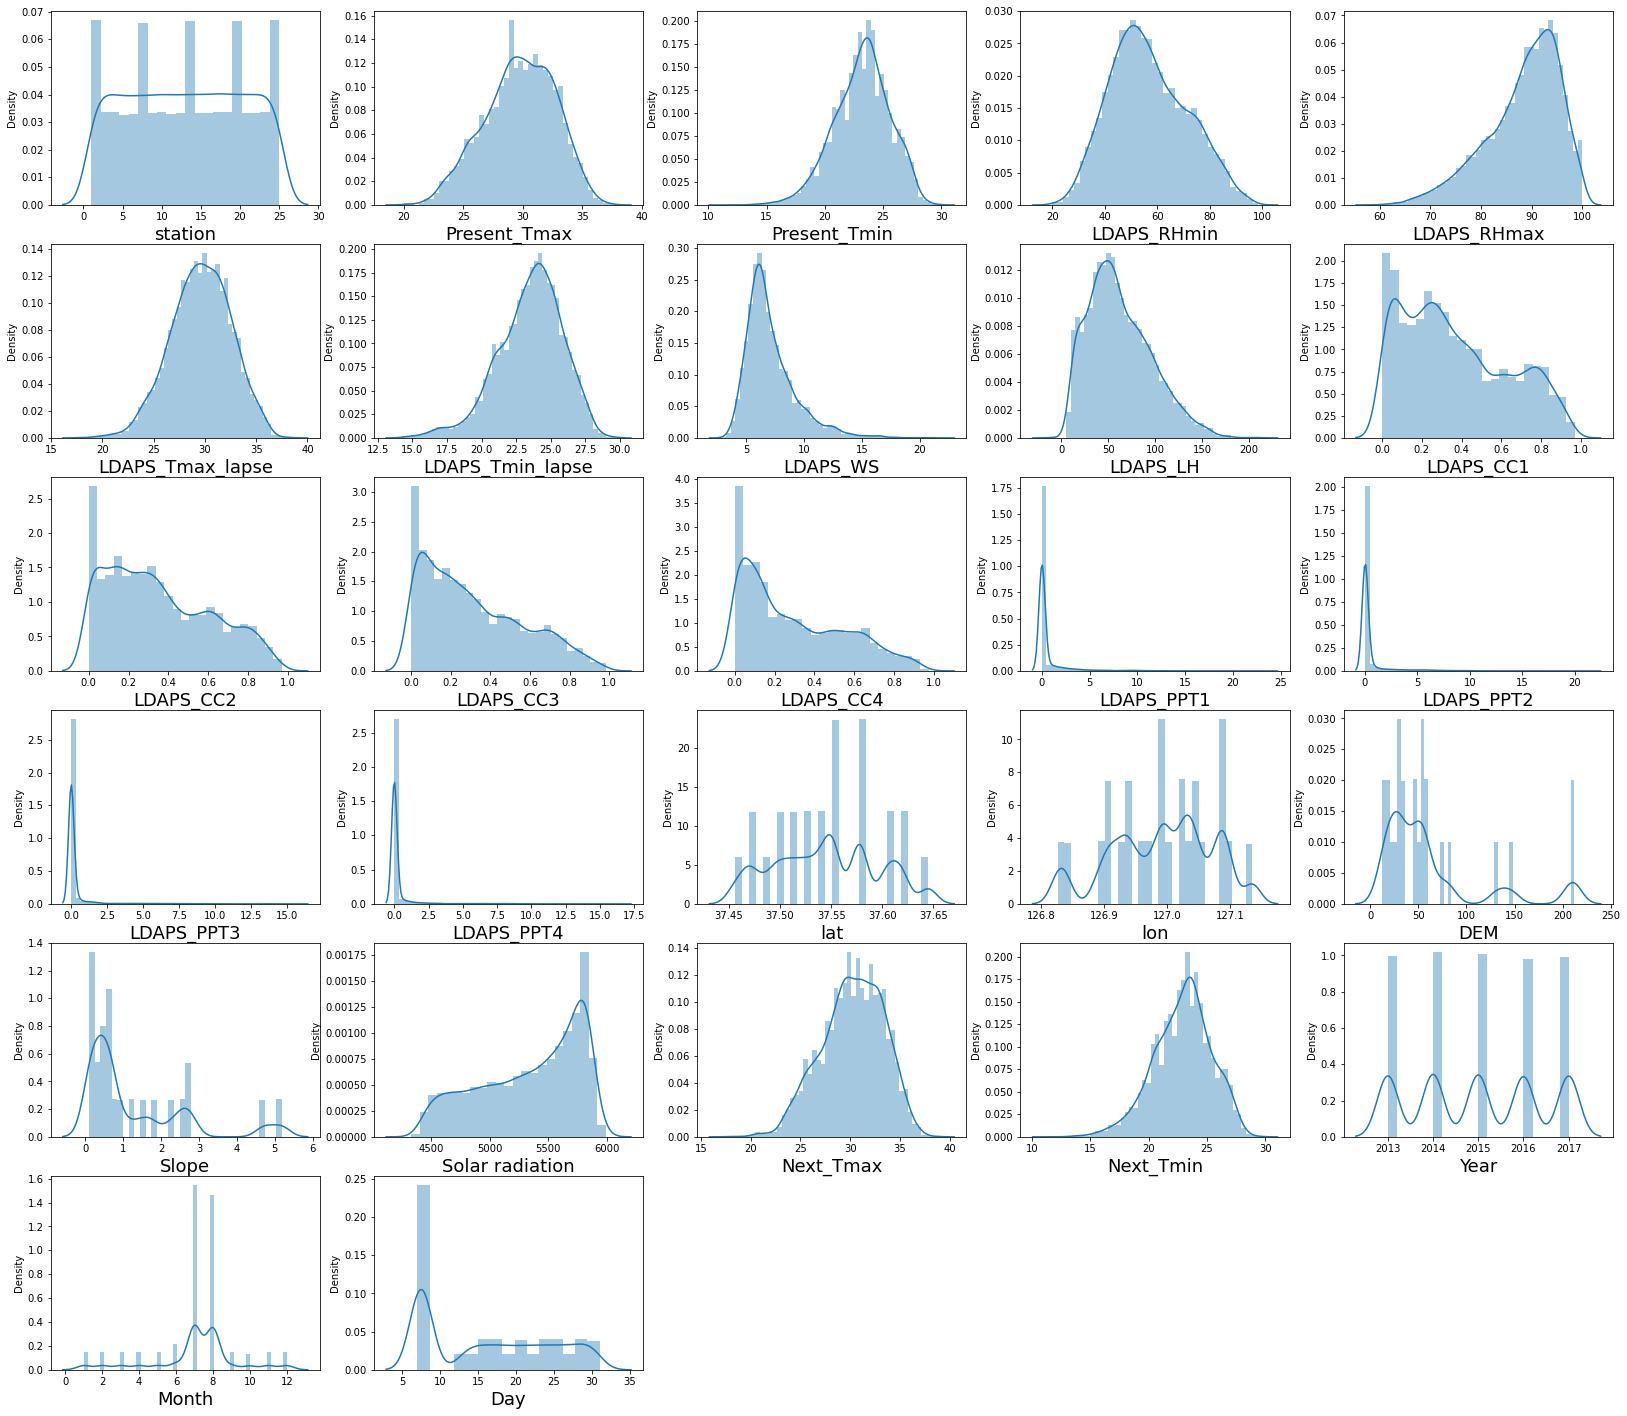

In [33]:
# LET'S CHECK THE SKWENESS OF OUR DATASET USING DISTPLOT
plt.figure(figsize=(28,25))
plotnumber=1
for column in temperature_new.columns:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(temperature[column])
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.show()

AS YOU CAN SE BY LOOKING AT THE GRAPG WE CAN SAY MANY FEATURE ARE PERFECTLY BELL SHAPED CURVE AND MANY OF THEM MAYBE RIGHT OR LEFT SKWEED BUT WE CANNOT TILL WECHECK FURTHER THE SKWENESS SCORE ONCE WE HAVE CHECK THE SKWENESS SCORE THEN WE CAN PREDICT ANY FEATURE IS RIGHT OR LEFT SKWEED OR POERFECTLY BELL SHAPED CURVE

In [34]:
# LET'S CHECK SKWENESS SCORE
temperature_new.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Year                0.025066
Month              -0.680725
Day                 0.256528
dtype: float64

AS YOU CAN SEE ONLY TWO FEATURE HAVE SKWENEZS IN THE RANGE -5 TO +5 LDAPS_PPT4 AND LDAPS_PPT3 SO WE HAVE TO USE CERATIN TRANSFORMATION TO REDUCE THAT SKWENESS AND MAKE IT IN SUITABLE RANGE 

In [35]:
# LET'S USE SQRT TRANSFORMATION TO REDUCE THIS 
temperature_new["LDAPS_PPT3"]=np.sqrt(temperature["LDAPS_PPT3"])

In [36]:
temperature_new["LDAPS_PPT4"]=np.sqrt(temperature["LDAPS_PPT4"])

In [37]:
temperature_new.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          3.365579
LDAPS_PPT4          3.709695
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Year                0.025066
Month              -0.680725
Day                 0.256528
dtype: float64

AS YOU CAN SEE THAT WE HAVE REMOVE THE SKWENESS FROM THESE TWO FEATUER LDAPS_PPT3,LDAPS_PPT4 SO NOW OUR DATSET IS CLEANED FROM SKWENESS AND OUTLIERS 

# LET'S CHECK THE MULTICOLLINEARITY FROM THE DATASET

# HEAT MAP

In [38]:
corr=temperature_new.corr()

In [39]:
corr

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.176388     -0.297804     -0.039688     0.552581   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.104401      0.616886      0.764258     0.129481   
LDAPS_WS          0.023075     -0.105162      0.018711     0.236324   
LDAPS_LH         -0.135023      0.130771     -0.004055    -0.035217   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006875     -0.060549      0.041457     0.653782   
LDAPS_CC4         0.011167     -0.049339     -0.006979     0.458417   
LDAPS_PPT1       -0.001758     -0.135546      0.073741     0.289740   
LDAPS_PPT2       -0.021036     -0.040151      0.084705     0.376428   
LDAPS_PPT3       -0.001385     -0.021656      0.038862     0.355421   
LDAPS_PPT4        0.010163     -0.037882     -0.065524     0.230598   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.257894     -0.168792     -0.241396     0.094391   
Slope            -0.096863     -0.091336     -0.138107     0.119216   
Solar radiation  -0.032810     -0.059891      0.020030     0.251733   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Year              0.006658      0.099185      0.099222     0.001709   
Month             0.003657      0.022300     -0.021664    -0.074915   
Day               0.005179     -0.136914     -0.076877    -0.070194   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.176388          0.066863          0.104401  0.023075   
Present_Tmax        -0.297804          0.540680          0.616886 -0.105162   
Present_Tmin        -0.039688          0.441577          0.764258  0.018711   
LDAPS_RHmin          0.552581         -0.555583          0.129481  0.236324   
LDAPS_RHmax          1.000000         -0.385695         -0.142575  0.094523   
LDAPS_Tmax_lapse    -0.385695          1.000000          0.621299 -0.229614   
LDAPS_Tmin_lapse    -0.142575          0.621299          1.000000 -0.052648   
LDAPS_WS             0.094523         -0.229614         -0.052648  1.000000   
LDAPS_LH             0.274590          0.036340         -0.135842 -0.045067   
LDAPS_CC1            0.409436         -0.416255          0.037375  0.257654   
LDAPS_CC2            0.360372         -0.492392          0.102180  0.220722   
LDAPS_CC3            0.167666         -0.500630          0.021654  0.180543   
LDAPS_CC4            0.049217         -0.384825         -0.027327  0.180312   
LDAPS_PPT1           0.308453         -0.182235         -0.010311  0.179201   
LDAPS_PPT2           0.225832         -0.237892          0.012282  0.115051   
LDAPS_PPT3           0.179461         -0.227068         -0.003495  0.149163   
LDAPS_PPT4           0.120637         -0.201378         -0.095918  0.225438   
lat                  0.200216         -0.038285         -0.090587 -0.014440   
lon                  0.018945          0.106354         -0.024177 -0.077116   
DEM                  0.172348         -0.162061         -0.177845  0.150448   
Slope                0.218465         -0.148246         -0.172382  0.118546   
Solar radiation      0.153673          0.012974          0.106033  0.136180   
Next_Tmax           -0.301797          0.816861          0.546479 -0.277823   
Next_Tmin           -0.097490          0.553227          0.875382 -0.013668   
Year                -0.140290          0.066794        

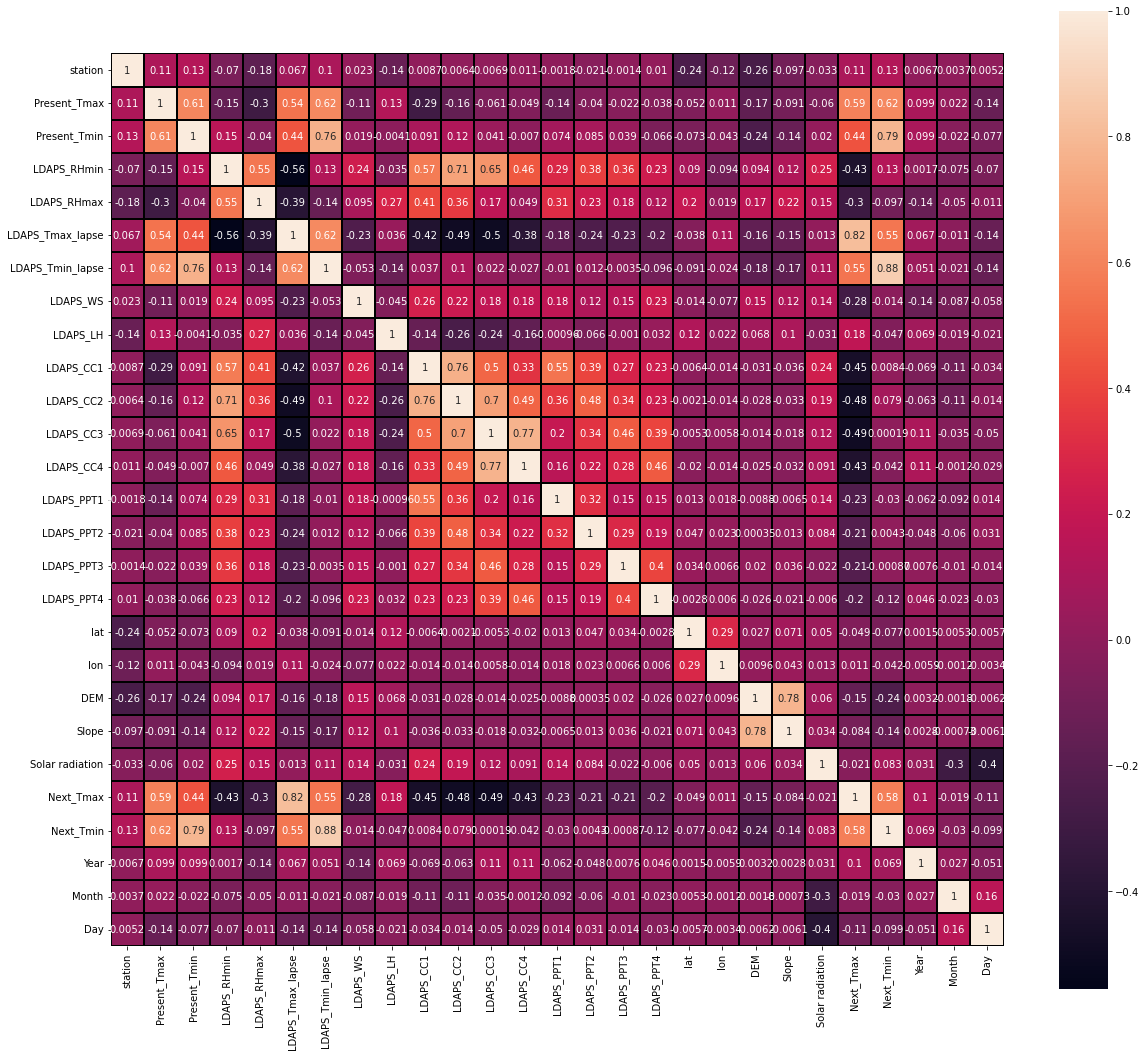

In [40]:
plt.figure(figsize=(20,18))
sns.heatmap(corr,annot=True,annot_kws={'size':10},linewidth=2,linecolor='black',square=True)
plt.show()

AS YOU CAN SEE THAT OUR TARGET VARIABLE NEXT_TMAX AND NEXT_TMIN HAVE STRONG COORELATION WITH PRESENT_TMAX AND PRESENT_TMIN , LDAPS_TMAX_LAPSE,LDAPS_TMIN_LAPSE ALL THESE ARE HIGHLY COORELATED AND REST OF THEM ARE NEGATIVELY COORELATED WITH EACH OTHER NOW STILL WE CAN SAY ANYTHING SO LET;S CHECK THROUGH VIF THAT THESE ARE HOW MUCH COORELATED 

In [41]:
corr["Next_Tmax"].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.816861
Present_Tmax        0.586943
Next_Tmin           0.580951
LDAPS_Tmin_lapse    0.546479
Present_Tmin        0.438813
LDAPS_LH            0.176077
station             0.106378
Year                0.101615
lon                 0.010567
Month              -0.018696
Solar radiation    -0.021477
lat                -0.048616
Slope              -0.083907
Day                -0.105005
DEM                -0.151929
LDAPS_PPT4         -0.201582
LDAPS_PPT3         -0.210771
LDAPS_PPT2         -0.211431
LDAPS_PPT1         -0.233124
LDAPS_WS           -0.277823
LDAPS_RHmax        -0.301797
LDAPS_CC4          -0.427087
LDAPS_RHmin        -0.433872
LDAPS_CC1          -0.453763
LDAPS_CC2          -0.484796
LDAPS_CC3          -0.492707
Name: Next_Tmax, dtype: float64

In [42]:
corr["Next_Tmin"].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.875382
Present_Tmin        0.785946
Present_Tmax        0.615950
Next_Tmax           0.580951
LDAPS_Tmax_lapse    0.553227
LDAPS_RHmin         0.134518
station             0.129110
Solar radiation     0.083207
LDAPS_CC2           0.078871
Year                0.069291
LDAPS_CC1           0.008400
LDAPS_PPT2          0.004340
LDAPS_CC3           0.000194
LDAPS_PPT3         -0.000873
LDAPS_WS           -0.013668
LDAPS_PPT1         -0.029752
Month              -0.030289
lon                -0.041574
LDAPS_CC4          -0.041994
LDAPS_LH           -0.046540
lat                -0.076705
LDAPS_RHmax        -0.097490
Day                -0.099202
LDAPS_PPT4         -0.115640
Slope              -0.136838
DEM                -0.237683
Name: Next_Tmin, dtype: float64

In [43]:
# let's visulaize this target variable with other features 
corr_target = corr['Next_Tmax'].sort_values(ascending=False).drop('Next_Tmax')
corr_df = pd.DataFrame(corr_target)
corr_df.reset_index(inplace=True)

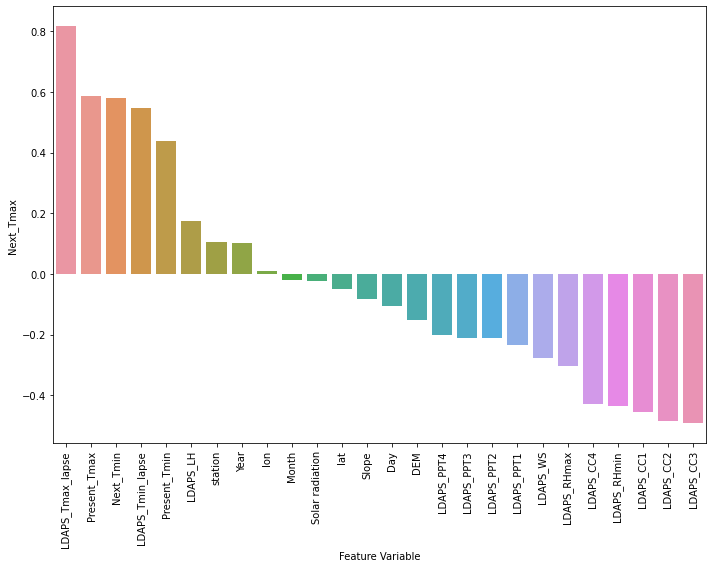

In [44]:
plt.figure(figsize=(10, 8))
sns.barplot(x='index', y='Next_Tmax', data=corr_df)
plt.xlabel('Feature Variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

BY VUISULAIZATION ALSO WE CAN SEE THAT ALL THE POSITIVE COORRELATED AND NEAGATIVELY CORRELATED FEATURE WHICH INFLUENCE OUR TARGET VARIABLE NEXT_TMAX

In [45]:
# NOW LET'S PLOT FOR NEXT_TMIN 
# let's visulaize this target variable with other features 
corr_target = corr['Next_Tmin'].sort_values(ascending=False).drop('Next_Tmin')
corr_df = pd.DataFrame(corr_target)
corr_df.reset_index(inplace=True)

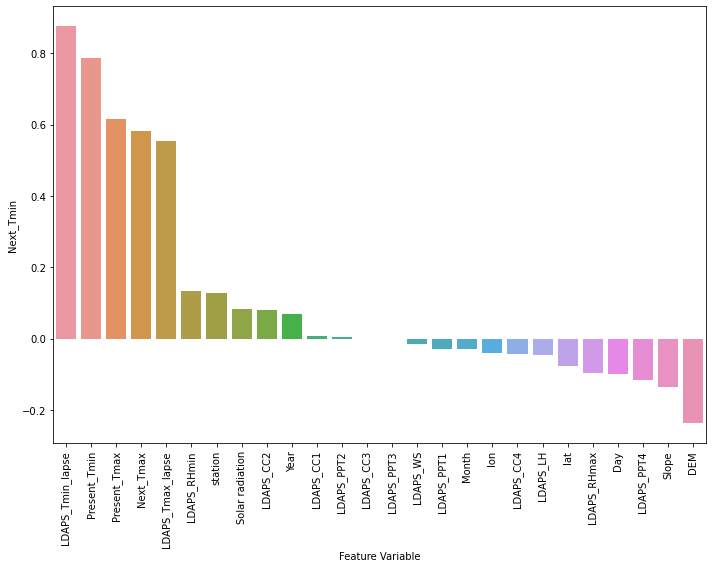

In [46]:
plt.figure(figsize=(10, 8))
sns.barplot(x='index', y='Next_Tmin', data=corr_df)
plt.xlabel('Feature Variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

THIS IS SAME AS ABOVE ONLY THIS TIME MY SECOND TARGET VARIBLE I ISED TO CHECK RELATIONSHIP

# NOW WE AV TO CHECK VIF VALUE FOR THAT WE HAVE TO STANDARIZED OUR DATASET 

# STANDARIZATION

In [47]:
# LET'S SEPRATE THE TAGET AND FEATURE VARIABLE FROM THE DATASET 
x= temperature_new.drop("Next_Tmax",axis=1)
y=temperature_new["Next_Tmax"]

In [48]:
x.shape

(6739, 26)

In [49]:
y.shape

(6739,)

In [50]:
x.drop('Next_Tmin',axis=1,inplace=True)

In [51]:
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.203896  1.616969e-01   0.130928         0.0         0.0         0.0   
1      0.251771  1.594441e-01   0.127727         0.0         0.0         0.0   
2      0.257469  2.040915e-01   0.142125         0.0         0.0         0.0   
3      0.226002  1.611574e-01   0.134249         0.0         0.0         0.0   
4      0.249995  1.788925e-01   0.170021         0.0         0.0         0.0   
...         ...           ...        ...         ...         ...         ...   
7745   0.030169  0.000000e+00   0.004380         0.0         0.0         0.0   
7746   0.024518  5.850000e-07   0.017678         0.0         0.0         0.0   
7747   0.081035  0.000000e+00   0.000000         0.0         0.0         0.0   
7748   0.074962  0.000000e+00   0.000000         0.0         0.0         0.0   
7749   0.059869  0.000000e+00   0.000796         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Year  \
0            0.0  37.6046  126.991  212.3350  2.7850      5992.895996  2013   
1            0.0  37.6046  127.032   44.7624  0.5141      5869.312500  2013   
2            0.0  37.5776  127.058   33.3068  0.2661      5863.555664  2013   
3            0.0  37.6450  127.022   45.7160  2.5348      5856.964844  2013   
4            0.0  37.5507  127.135   35.0380  0.5055      5859.552246  2013   
...          ...      ...      ...       ...     ...              ...   ...   
7745         0.0  37.5507  127.040   26.2980  0.5721      4456.024414  2017   
7746         0.0  37.5102  127.086   21.9668  0.1332      4441.803711  2017   
7747         0.0  37.5372  126.891   15.5876  0.1554      4443.313965  2017   
7748         0.0  37.5237  126.909   17.2956  0.2223      4438.373535  2017   
7749         0.0  37.5237  126.970   19.5844  0.2713      4451.345215  2017   

      Month  Day  
0         6   30  
1         6   30  
2         6   30  
3         6   30  
4         6   30  
...     ...  ...  
7745      8   30  
7746      8   30  
7747      8   30  
7748      8   30  
7749      8   30  

[6739 rows x 25 columns]

# Let's use standard scaler to standarized the data

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [53]:
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672719     -0.425704     -0.814460     0.195915     0.437537   
1    -1.533959      0.690215     -0.727785    -0.236604     0.364239   
2    -1.395198      0.585598      0.008945    -0.494494    -0.585732   
3    -1.256438      0.725088      0.052282     0.194767     1.206456   
4    -1.117678      0.515853     -0.597774     0.045667     0.299831   
...        ...           ...           ...          ...          ...   
6734  1.102482     -2.378563     -2.374595    -2.226900    -1.404059   
6735  1.241243     -2.587798     -2.547943    -1.836710    -0.626356   
6736  1.380003     -2.308818     -2.677955    -2.078766    -1.316889   
6737  1.518763     -2.308818     -2.417932    -2.273699    -1.542506   
6738  1.657523     -2.343691     -2.547943    -2.353646    -1.549845   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0            -0.662498         -0.289928 -0.020735  0.225115  -0.440130   
1            -0.016693          0.171379 -0.631488 -0.298746  -0.473686   
2             0.070769          0.409475 -0.389607 -1.236867  -0.537958   
3            -0.069787         -0.146681 -0.654162  0.113709  -0.510012   
4            -0.284509         -0.074752 -0.608123  1.377075  -0.768323   
...                ...               ...       ...       ...        ...   
6734         -0.757521         -2.400625 -0.137593 -1.564654  -1.159992   
6735         -1.160213         -2.620034 -0.590197  0.604824  -1.106080   
6736         -1.288468         -2.188536 -0.383811  0.303076  -1.250919   
6737         -1.049238         -2.207453 -0.170344 -0.439205  -1.227700   
6738         -0.711421         -2.301931  0.234177 -1.580329  -1.175693   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0     -0.526550  -0.568017  -0.614602   -0.341277   -0.277993   -0.388153   
1     -0.327568  -0.577779  -0.628231   -0.341277   -0.277993   -0.388153   
2     -0.303886  -0.384307  -0.566924   -0.341277   -0.277993   -0.388153   
3     -0.434669  -0.570355  -0.600463   -0.341277   -0.277993   -0.388153   
4     -0.334950  -0.493503  -0.448143   -0.341277   -0.277993   -0.388153   
...         ...        ...        ...         ...         ...         ...   
6734  -1.248595  -1.268705  -1.153447   -0.341277   -0.277993   -0.388153   
6735  -1.272079  -1.268702  -1.096825   -0.341277   -0.277993   -0.388153   
6736  -1.037185  -1.268705  -1.172097   -0.341277   -0.277993   -0.388153   
6737  -1.062424  -1.268705  -1.172097   -0.341277   -0.277993   -0.388153   
6738  -1.125157  -1.268705  -1.168707   -0.341277   -0.277993   -0.388153   

      LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0      -0.345686  1.211166  0.002925  2.828736  1.143153         1.543068   
1      -0.345686  1.211166  0.518733 -0.304406 -0.536509         1.249502   
2      -0.345686  0.671467  0.845830 -0.518594 -0.719941         1.235827   
3      -0.345686  2.018714  0.392926 -0.286576  0.958094         1.220170   
4      -0.345686  0.133768  1.814542 -0.486225 -0.542870         1.226317   
...          ...       ...       ...       ...       ...              ...   
6734   -0.345686  0.133768  0.619378 -0.649639 -0.493610        -2.107693   
6735   -0.345686 -0.675779  1.198089 -0.730620 -0.818240        -2.141474   
6736   -0.345686 -0.136081 -1.255142 -0.849894 -0.801820        -2.137886   
6737   -0.345686 -0.405930 -1.028689 -0.817959 -0.752338        -2.149622   
6738   -0.345686 -0.405930 -0.261269 -0.775165 -0.716095        -2.118808   

          Year     Month       Day  
0    -1.421473 -0.479519  1.674045  
1    -1.421473 -0.479519  1.674045  
2    -1.421473 -0.479519  1.674045  
3    -1.421473 -0.479519  1.674045  
4    -1.421473 -0.479519  1.674045  
...        ...       ...       ...  
6734  1.442938  0.410206  1.674045  
6735  1.442938  0.410206  1.674045  
6736  1.442938  0.410206  1.674045  
6737  1.442938  0.410

AS YOU CAN SEE WE HAVE STANDARIZED OUR MODEL GIVE EQUAL IMMPORTANCE TO EVERY ELEMENT NOW WE CAN CHECK MULTICOLLNEARITY AND BUILD OOR MODEL 

# let's check multicollinearity using VIF

In [54]:
#  LET'S CHECK THE MULTICOLLINEARITY VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["VIF_value"]=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif_data["feature"]=x.columns

In [55]:
vif_data

VIF_value           feature
0    1.232875           station
1    2.759706      Present_Tmax
2    3.153666      Present_Tmin
3    5.952922       LDAPS_RHmin
4    2.301576       LDAPS_RHmax
5    7.020350  LDAPS_Tmax_lapse
6    7.069137  LDAPS_Tmin_lapse
7    1.252964          LDAPS_WS
8    1.557968          LDAPS_LH
9    3.574267         LDAPS_CC1
10   4.774669         LDAPS_CC2
11   5.159928         LDAPS_CC3
12   2.914094         LDAPS_CC4
13   1.554506        LDAPS_PPT1
14   1.423807        LDAPS_PPT2
15   1.512490        LDAPS_PPT3
16   1.556553        LDAPS_PPT4
17   1.227425               lat
18   1.173779               lon
19   3.133068               DEM
20   2.943832             Slope
21   1.513577   Solar radiation
22   1.146213              Year
23   1.129107             Month
24   1.266534               Day

AS YOU CAN SEE THAT ONLY ONE COLUMN IS HAVING HIGH VIF VALUE WHICH IS JOB ROLE SO WE HAVE TO DROP THE LDAPS_CC3 SO WE HAVE GOOD DATATSET

In [56]:
x.drop("LDAPS_CC3",axis=1,inplace=True)

In [57]:
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672719     -0.425704     -0.814460     0.195915     0.437537   
1    -1.533959      0.690215     -0.727785    -0.236604     0.364239   
2    -1.395198      0.585598      0.008945    -0.494494    -0.585732   
3    -1.256438      0.725088      0.052282     0.194767     1.206456   
4    -1.117678      0.515853     -0.597774     0.045667     0.299831   
...        ...           ...           ...          ...          ...   
6734  1.102482     -2.378563     -2.374595    -2.226900    -1.404059   
6735  1.241243     -2.587798     -2.547943    -1.836710    -0.626356   
6736  1.380003     -2.308818     -2.677955    -2.078766    -1.316889   
6737  1.518763     -2.308818     -2.417932    -2.273699    -1.542506   
6738  1.657523     -2.343691     -2.547943    -2.353646    -1.549845   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0            -0.662498         -0.289928 -0.020735  0.225115  -0.440130   
1            -0.016693          0.171379 -0.631488 -0.298746  -0.473686   
2             0.070769          0.409475 -0.389607 -1.236867  -0.537958   
3            -0.069787         -0.146681 -0.654162  0.113709  -0.510012   
4            -0.284509         -0.074752 -0.608123  1.377075  -0.768323   
...                ...               ...       ...       ...        ...   
6734         -0.757521         -2.400625 -0.137593 -1.564654  -1.159992   
6735         -1.160213         -2.620034 -0.590197  0.604824  -1.106080   
6736         -1.288468         -2.188536 -0.383811  0.303076  -1.250919   
6737         -1.049238         -2.207453 -0.170344 -0.439205  -1.227700   
6738         -0.711421         -2.301931  0.234177 -1.580329  -1.175693   

      LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  \
0     -0.526550  -0.614602   -0.341277   -0.277993   -0.388153   -0.345686   
1     -0.327568  -0.628231   -0.341277   -0.277993   -0.388153   -0.345686   
2     -0.303886  -0.566924   -0.341277   -0.277993   -0.388153   -0.345686   
3     -0.434669  -0.600463   -0.341277   -0.277993   -0.388153   -0.345686   
4     -0.334950  -0.448143   -0.341277   -0.277993   -0.388153   -0.345686   
...         ...        ...         ...         ...         ...         ...   
6734  -1.248595  -1.153447   -0.341277   -0.277993   -0.388153   -0.345686   
6735  -1.272079  -1.096825   -0.341277   -0.277993   -0.388153   -0.345686   
6736  -1.037185  -1.172097   -0.341277   -0.277993   -0.388153   -0.345686   
6737  -1.062424  -1.172097   -0.341277   -0.277993   -0.388153   -0.345686   
6738  -1.125157  -1.168707   -0.341277   -0.277993   -0.388153   -0.345686   

           lat       lon       DEM     Slope  Solar radiation      Year  \
0     1.211166  0.002925  2.828736  1.143153         1.543068 -1.421473   
1     1.211166  0.518733 -0.304406 -0.536509         1.249502 -1.421473   
2     0.671467  0.845830 -0.518594 -0.719941         1.235827 -1.421473   
3     2.018714  0.392926 -0.286576  0.958094         1.220170 -1.421473   
4     0.133768  1.814542 -0.486225 -0.542870         1.226317 -1.421473   
...        ...       ...       ...       ...              ...       ...   
6734  0.133768  0.619378 -0.649639 -0.493610        -2.107693  1.442938   
6735 -0.675779  1.198089 -0.730620 -0.818240        -2.141474  1.442938   
6736 -0.136081 -1.255142 -0.849894 -0.801820        -2.137886  1.442938   
6737 -0.405930 -1.028689 -0.817959 -0.752338        -2.149622  1.442938   
6738 -0.405930 -0.261269 -0.775165 -0.716095        -2.118808  1.442938   

         Month       Day  
0    -0.479519  1.674045  
1    -0.479519  1.674045  
2    -0.479519  1.674045  
3    -0.479519  1.674045  
4    -0.479519  1.674045  
...        ...       ...  
6734  0.410206  1.674045  
6735  0.410206  1.674045  
6736  0.410206  1.674045  
6737  0.410206  1.674045  
6738  0.410206  1.674045  

[6739 rows x 24 columns]

In [58]:
vif_data=pd.DataFrame()
vif_data["VIF_value"]=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif_data["feature"]=x.columns

In [59]:
vif_data

VIF_value           feature
0    1.232794           station
1    2.683680      Present_Tmax
2    3.148544      Present_Tmin
3    5.719961       LDAPS_RHmin
4    2.278212       LDAPS_RHmax
5    6.916373  LDAPS_Tmax_lapse
6    7.068268  LDAPS_Tmin_lapse
7    1.246782          LDAPS_WS
8    1.513087          LDAPS_LH
9    3.570305         LDAPS_CC1
10   4.477042         LDAPS_CC2
11   1.896944         LDAPS_CC4
12   1.550895        LDAPS_PPT1
13   1.421451        LDAPS_PPT2
14   1.369815        LDAPS_PPT3
15   1.556263        LDAPS_PPT4
16   1.226708               lat
17   1.159597               lon
18   3.132549               DEM
19   2.940650             Slope
20   1.513565   Solar radiation
21   1.127000              Year
22   1.129081             Month
23   1.263651               Day

AS YOU CAN SEE WE HAVE REDUCE THE MULTICOLLINEARITY FROM THE DATASET NOW OUR DATASET IS PERFECTLY FINE TO START BUILDING  REGRESSION MODEL IN THIS DATASET 

# NOW WE BUILD OUR MACHINE LEARNING MODEL

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR

# LINEAR REGRESSION

In [61]:
def select_best_random_state(x, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        LR = LinearRegression()
        LR.fit(X_train, y_train)
        y_pred = LR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 84
Best r2_score:-  78.89657988436409


In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=84)
LR=LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train=LR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 75.60962896329175
mean_squared_error 1.8844978434714825
men absolute eroor 1.047016591259646
mean_squared_error 1.3727701349721602


# RANDOM FOREST REGRESSOR

In [63]:
def select_best_random_state(x, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        RFR=RandomForestRegressor()
        RFR.fit(X_train, y_train)
        y_pred = RFR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 84
Best r2_score:-  90.78532539418812


In [64]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=84)
RFR=RandomForestRegressor()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
y_pred_train=RFR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 98.43925203297046
mean_squared_error 0.8329124436201787
men absolute eroor 0.6792685459940653
mean_squared_error 0.9126403692693955


# DESCION TREE REGRESSOR

In [65]:
def select_best_random_state(x, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        DTR=DecisionTreeRegressor()
        DTR.fit(X_train, y_train)
        y_pred = DTR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state
            

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)



Best Random State  : 116
Best r2_score:-  79.7908935041918


In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=116)
DTR=DecisionTreeRegressor()
DTR.fit(X_train, y_train)
y_pred = DTR.predict(X_test)
y_pred_train=DTR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 100.0
mean_squared_error 1.9587759643916915
men absolute eroor 1.0184718100890209
mean_squared_error 1.3995627761524996


# GRADIENT BOOSTING REGRESSOR

In [67]:
def select_best_random_state(x, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        GBR=GradientBoostingRegressor()
        GBR.fit(X_train, y_train)
        y_pred = GBR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 84
Best r2_score:-  87.1524516902937


In [68]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=84)
GBR=GradientBoostingRegressor()
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
y_pred_train=GBR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 87.11990100699218
mean_squared_error 1.1472888408596482
men absolute eroor 0.8235378837761618
mean_squared_error 1.0711156991005446


# EXTRA TREE REGRESSOR

In [69]:
def select_best_random_state(x, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        ETR = ExtraTreesRegressor()
        ETR.fit(X_train, y_train)
        y_pred = ETR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 112
Best r2_score:-  93.44095023158171


In [70]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=112)
ETR=ExtraTreesRegressor()
ETR.fit(X_train, y_train)
y_pred = ETR.predict(X_test)
y_pred_train=ETR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 100.0
mean_squared_error 0.5745071446587536
men absolute eroor 0.5849443620178042
mean_squared_error 0.7579624955489247


# KNEIGHBOURS CLASSIFIER

In [71]:
def select_best_random_state(x, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        knn = KNN()
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 52
Best r2_score:-  88.4993183028722


In [72]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)
knn=KNN()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_train=knn.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 91.19087421413835
mean_squared_error 1.0032738872403562
men absolute eroor 0.750786350148368
mean_squared_error 1.0016356060166571


# SUPPORT VECTOR MACHINE REGRESSOR

In [73]:
def select_best_random_state(x, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        svr = SVR()
        svr.fit(X_train, y_train)
        y_pred = svr.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 52
Best r2_score:-  89.04072346504387


In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)
svr=SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
y_pred_train=knn.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 91.19087421413835
mean_squared_error 0.9560438468020032
men absolute eroor 0.7069342278892443
mean_squared_error 0.9777749469085425


# Now after doing all this we will do cross validation to test that our model overfitting or not

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
cvr=cross_val_score(LR,x,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.70509924 0.67099659 0.69628635 0.71007803 0.53483702]
0.6634594435215946
differencve of r2_score and cross_val_score 20.66942815751923


In [77]:
cvr=cross_val_score(RFR,x,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.7312848  0.64173708 0.66768304 0.68973898 0.57822117]
0.6617330143004605
differencve of r2_score and cross_val_score 20.84207107963264


In [78]:
cvr=cross_val_score(GBR,x,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.73664807 0.67323631 0.71779739 0.69852246 0.60847686]
0.6869362167036206
differencve of r2_score and cross_val_score 18.321750839316632


In [79]:
cvr=cross_val_score(DTR,x,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.41765176 0.31306805 0.34638009 0.48764054 0.37648283]
0.3882446532239957
differencve of r2_score and cross_val_score 48.19090718727912


In [80]:
cvr=cross_val_score(knn,x,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.50589794 0.30316451 0.47950289 0.60051223 0.4820595 ]
0.47422741322346074
differencve of r2_score and cross_val_score 39.592631187332614


In [81]:
cvr=cross_val_score(ETR,x,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.76485015 0.61943663 0.68490232 0.72370841 0.55884108]
0.6703477186655128
differencve of r2_score and cross_val_score 19.98060064312741


# HERE IAM CHOOSING THE GRADIENT BOOSTING REGRESOR AS MY BEST MODEL BECAUSE IF CHECK THE DIFFERENCE BETWEEN THE R2 SCORE AND CROSS VALIDATION IT IS LEAST SO I DECIDED TO CHOOSE THE

# LET'S DO HYPERPARAMETER TUNNING

In [82]:
from sklearn.model_selection import GridSearchCV

In [84]:
params= {
    'n_estimators': [100,150],  # List of values to try for n_estimators
    'learning_rate': [0.2,0.1,0.3],
    'max_depth': [4,5,],
    'min_samples_split': [3,2,],
    'min_samples_leaf': [1,3,],
    'loss': ['squared_error']
}

In [85]:
GSCV=GridSearchCV(GradientBoostingRegressor(),params,cv=5)

In [86]:
GSCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2, 0.1, 0.3],
                         'loss': ['squared_error'], 'max_depth': [4, 5],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [3, 2],
                         'n_estimators': [100, 150]})

In [87]:
GSCV.best_params_

{'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 150}

In [88]:
temperature_model=GradientBoostingRegressor(n_estimators=150,max_depth=5,min_samples_leaf=3,loss="squared_error",learning_rate=0.2,min_samples_split=3)

In [89]:
temperature_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=3,
                          min_samples_split=3, n_estimators=150)

In [90]:
pred=temperature_model.predict(X_test)

In [91]:
print("r2_score",r2_score(y_test,pred))
print("mean_squared_error",mean_squared_error(y_test,pred))
print("mean_absolute_error",mean_absolute_error(y_test,pred))
print("root_mean_squared_error",np.sqrt(mean_squared_error(y_test,pred)))

r2_score 0.9349261898790789
mean_squared_error 0.5676781268875752
mean_absolute_error 0.570968850157127
root_mean_squared_error 0.7534441763578608


In [92]:
import pickle
project_name="temperature forecast prediction.pkl"
pickle.dump(temperature_model,open(project_name,'wb'))

In [93]:
import pickle
load_final_model=pickle.load(open('temperature forecast prediction.pkl','rb'))
final_result=load_final_model.score(X_test,y_test)
print(final_result*100)

93.49261898790789


In [94]:
target_variable_prediction=pd.DataFrame([load_final_model.predict(X_test)[:],y_test[:]],index=["predicted","original"])

In [95]:
target_variable_prediction

0          1          2          3          4          5     \
predicted  31.610901  28.940961  33.514872  32.809474  32.048397  28.716347   
original   32.700000  29.700000  33.900000  32.900000  32.200000  28.600000   

                6         7          8          9          10         11    \
predicted  31.542607  32.29247  31.690748  35.487737  27.745013  32.048602   
original   30.400000  31.90000  32.300000  36.500000  27.600000  31.500000   

                12         13        14         15         16         17    \
predicted  33.838453  29.301024  30.03749  31.648302  26.107226  28.417896   
original   34.500000  28.900000  31.50000  30.900000  27.500000  28.200000   

                18         19         20         21         22         23    \
predicted  28.461275  32.222798  32.800014  30.566039  27.259691  35.708579   
original   28.100000  32.300000  33.100000  30.200000  26.600000  35.300000   

                24         25         26         27         28         29    \
predicted  27.728886  27.424529  27.745099  32.485332  29.607156  26.744641   
original   28.500000  28.200000  28.500000  33.000000  28.600000  26.600000   

                30         31         32         33         34         35    \
predicted  31.395692  31.650588  36.702807  29.095374  32.376956  24.764635   
original   31.900000  32.100000  37.400000  28.700000  31.900000  25.300000   

                36         37         38        39        40         41    \
predicted  32.291092  35.205322  29.006265  30.07212  26.81241  34.733148   
original   33.000000  34.900000  29.500000  30.20000  27.30000  34.600000   

                42         43         44         45         46        47    \
predicted  33.341753  31.470719  31.599281  30.330518  27.775066  28.90715   
original   33.400000  30.300000  31.600000  31.600000  27.100000  29.10000   

                48         49         50         51         52         53    \
predicted  35.378984  32.529008  34.269297  24.128367  34.682674  30.842311   
original   34.500000  33.800000  34.000000  23.900000  34.000000  30.500000   

                54         55         56         57         58         59    \
predicted  31.672476  31.707466  26.643139  34.705883  30.285398  27.689762   
original   31.300000  32.300000  26.900000  33.900000  29.800000  28.700000   

                60         61         62         63         64         65    \
predicted  30.926569  34.603082  33.148717  26.715208  29.700928  29.566633   
original   31.300000  34.200000  33.500000  27.300000  28.300000  31.200000   

                66         67         68         69         70         71    \
predicted  30.318592  32.738203  33.698532  33.413074  31.506756  25.633109   
original   31.700000  34.000000  33.600000  34.400000  32.100000  25.700000   

                72         73         74         75         76         77    \
predicted  30.735169  29.807739  31.709754  35.711365  34.820433  31.524448   
original   30.800000  29.200000  31.600000  36.100000  34.600000  31.100000   

                78         79         80         81         82         83    \
predicted  28.933088  30.361737  34.152619  30.304564  25.877474  25.526833   
original   28.400000  31.300000  35.000000  30.000000  25.700000  25.200000   

               84         85         86         87         88         89    \
predicted  23.26542  28.554575  30.195193  32.428149  25.972265  30.977348   
original   23.80000  27.000000  30.600000  32.900000  26.100000  30.800000   

                90         91         92        93         94         95    \
predicted  30.665849  29.518695  30.189427  32.10406  30.598112  28.877232   
original   30.700000  30.600000  29.900000  32.50000  31.300000  27.900000   

                96         97         98         99        100        101   \
predicted  32.123082  34.231839  28.628619  28.178121  31.54698  32.713955   
original   31.400000  34.800000  28.300000  27.800000  30.90000  32.70000

# OUR FINAL MODEL IS BUILD AND SCORE WAS ALMOST  93% ACCURATE WE CAN ASLO SEE THAT IT IS VERY GOOD MODEL AS BECAUSE WE CAN SEE THE TREND ALSO THAT PREDICTED TEMPERATURE IS ALMOST CLOSE TO ACTUAL VALUE WAS SO OUR FINAL MODEL IS PERFECT WITH ACCURACY SCORE 94%

# NOW WE BUILD ANOTHER REGRESSION MODEL BUT TIS TIME OUR TARGET VARIABLE IS NEXT_TMIN 

In [61]:
temperature_new

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.203896  1.616969e-01   0.130928         0.0         0.0         0.0   
1      0.251771  1.594441e-01   0.127727         0.0         0.0         0.0   
2      0.257469  2.040915e-01   0.142125         0.0         0.0         0.0   
3      0.226002  1.611574e-01   0.134249         0.0         0.0         0.0   
4      0.249995  1.788925e-01   0.170021         0.0         0.0         0.0   
...         ...           ...        ...         ...         ...         ...   
7745   0.030169  0.000000e+00   0.004380         0.0         0.0         0.0   
7746   0.024518  5.850000e-07   0.017678         0.0         0.0         0.0   
7747   0.081035  0.000000e+00   0.000000         0.0         0.0         0.0   
7748   0.074962  0.000000e+00   0.000000         0.0         0.0         0.0   
7749   0.059869  0.000000e+00   0.000796         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  \
0            0.0  37.6046  126.991  212.3350  2.7850      5992.895996   
1            0.0  37.6046  127.032   44.7624  0.5141      5869.312500   
2            0.0  37.5776  127.058   33.3068  0.2661      5863.555664   
3            0.0  37.6450  127.022   45.7160  2.5348      5856.964844   
4            0.0  37.5507  127.135   35.0380  0.5055      5859.552246   
...          ...      ...      ...       ...     ...              ...   
7745         0.0  37.5507  127.040   26.2980  0.5721      4456.024414   
7746         0.0  37.5102  127.086   21.9668  0.1332      4441.803711   
7747         0.0  37.5372  126.891   15.5876  0.1554      4443.313965   
7748         0.0  37.5237  126.909   17.2956  0.2223      4438.373535   
7749         0.0  37.5237  126.970   19.5844  0.2713      4451.345215   

      Next_Tmax  Next_Tmin  Year  Month  Day  
0          29.1       21.2  2013      6   30  
1          30.5       22.5  2013      6   30  
2          31.1       23.9  2013      6   30  
3          31.7       24.3  2013      6   30  
4          31.2       22.5  2013      6   30  
...         ...        ...   ...    ...  ...  
7745       27.6       17.7  2017      8   30  
7746       28.

In [62]:
# LET'S BUILD MODEL AND SEPRATE OUR TARGET AND FEATURE VARIABLE FROM OUR DATASET
x1=temperature_new.drop('Next_Tmin',axis=1)
y1=temperature_new["Next_Tmin"]

In [63]:
x1.shape

(6739, 26)

In [64]:
y1.shape

(6739,)

In [65]:
x1.drop("Next_Tmax",axis=1,inplace=True)

In [66]:
x1

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.203896  1.616969e-01   0.130928         0.0         0.0         0.0   
1      0.251771  1.594441e-01   0.127727         0.0         0.0         0.0   
2      0.257469  2.040915e-01   0.142125         0.0         0.0         0.0   
3      0.226002  1.611574e-01   0.134249         0.0         0.0         0.0   
4      0.249995  1.788925e-01   0.170021         0.0         0.0         0.0   
...         ...           ...        ...         ...         ...         ...   
7745   0.030169  0.000000e+00   0.004380         0.0         0.0         0.0   
7746   0.024518  5.850000e-07   0.017678         0.0         0.0         0.0   
7747   0.081035  0.000000e+00   0.000000         0.0         0.0         0.0   
7748   0.074962  0.000000e+00   0.000000         0.0         0.0         0.0   
7749   0.059869  0.000000e+00   0.000796         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Year  \
0            0.0  37.6046  126.991  212.3350  2.7850      5992.895996  2013   
1            0.0  37.6046  127.032   44.7624  0.5141      5869.312500  2013   
2            0.0  37.5776  127.058   33.3068  0.2661      5863.555664  2013   
3            0.0  37.6450  127.022   45.7160  2.5348      5856.964844  2013   
4            0.0  37.5507  127.135   35.0380  0.5055      5859.552246  2013   
...          ...      ...      ...       ...     ...              ...   ...   
7745         0.0  37.5507  127.040   26.2980  0.5721      4456.024414  2017   
7746         0.0  37.5102  127.086   21.9668  0.1332      4441.803711  2017   
7747         0.0  37.5372  126.891   15.5876  0.1554      4443.313965  2017   
7748         0.0  37.5237  126.909   17.2956  0.2223      4438.373535  2017   
7749         0.0  37.5237  126.970   19.5844  0.2713      4451.345215  2017   

      Month  Day  
0         6   30  
1         6   30  
2         6   30  
3         6   30  
4         6   30  
...     ...  ...  
7745      8   30  
7746      8   30  
7747      8   30  
7748      8   30  
7749      8   30  

[6739 rows x 25 columns]

In [67]:
x1.drop("LDAPS_CC3",axis=1,inplace=True)

In [68]:
x1

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  \
0      0.203896   0.130928         0.0         0.0         0.0         0.0   
1      0.251771   0.127727         0.0         0.0         0.0         0.0   
2      0.257469   0.142125         0.0         0.0         0.0         0.0   
3      0.226002   0.134249         0.0         0.0         0.0         0.0   
4      0.249995   0.170021         0.0         0.0         0.0         0.0   
...         ...        ...         ...         ...         ...         ...   
7745   0.030169   0.004380         0.0         0.0         0.0         0.0   
7746   0.024518   0.017678         0.0         0.0         0.0         0.0   
7747   0.081035   0.000000         0.0         0.0         0.0         0.0   
7748   0.074962   0.000000         0.0         0.0         0.0         0.0   
7749   0.059869   0.000796         0.0         0.0         0.0         0.0   

          lat      lon       DEM   Slope  Solar radiation  Year  Month  Day  
0     37.6046  126.991  212.3350  2.7850      5992.895996  2013      6   30  
1     37.6046  127.032   44.7624  0.5141      5869.312500  2013      6   30  
2     37.5776  127.058   33.3068  0.2661      5863.555664  2013      6   30  
3     37.6450  127.022   45.7160  2.5348      5856.964844  2013      6   30  
4     37.5507  127.135   35.0380  0.5055      5859.552246  2013      6   30  
...       ...      ...       ...     ...              ...   ...    ...  ...  
7745  37.5507  127.040   26.2980  0.5721      4456.024414  2017      8   30  
7746  37.5102  127.086   21.9668  0.1332      4441.803711  2017      8   30  
7747  37.5372  126.891   15.5876  0.1554      4443.313965  2017      8   30  
7748  37.5237  126.909   17.2956  0.2223      4438.373535  2017      8   30  
7749  37.5237  126.970   19.5844  0.2713      4451.345215  2017      8   30  

[6739 rows x 24 columns]

# LET'S DO STANDARD SCALER TO GIVE EQUAL IMPORTANCE TO ALL THE ELEMENTS IN THE DATASET

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)

In [70]:
x1

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672719     -0.425704     -0.814460     0.195915     0.437537   
1    -1.533959      0.690215     -0.727785    -0.236604     0.364239   
2    -1.395198      0.585598      0.008945    -0.494494    -0.585732   
3    -1.256438      0.725088      0.052282     0.194767     1.206456   
4    -1.117678      0.515853     -0.597774     0.045667     0.299831   
...        ...           ...           ...          ...          ...   
6734  1.102482     -2.378563     -2.374595    -2.226900    -1.404059   
6735  1.241243     -2.587798     -2.547943    -1.836710    -0.626356   
6736  1.380003     -2.308818     -2.677955    -2.078766    -1.316889   
6737  1.518763     -2.308818     -2.417932    -2.273699    -1.542506   
6738  1.657523     -2.343691     -2.547943    -2.353646    -1.549845   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0            -0.662498         -0.289928 -0.020735  0.225115  -0.440130   
1            -0.016693          0.171379 -0.631488 -0.298746  -0.473686   
2             0.070769          0.409475 -0.389607 -1.236867  -0.537958   
3            -0.069787         -0.146681 -0.654162  0.113709  -0.510012   
4            -0.284509         -0.074752 -0.608123  1.377075  -0.768323   
...                ...               ...       ...       ...        ...   
6734         -0.757521         -2.400625 -0.137593 -1.564654  -1.159992   
6735         -1.160213         -2.620034 -0.590197  0.604824  -1.106080   
6736         -1.288468         -2.188536 -0.383811  0.303076  -1.250919   
6737         -1.049238         -2.207453 -0.170344 -0.439205  -1.227700   
6738         -0.711421         -2.301931  0.234177 -1.580329  -1.175693   

      LDAPS_CC2  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  \
0     -0.526550  -0.614602   -0.341277   -0.277993   -0.388153   -0.345686   
1     -0.327568  -0.628231   -0.341277   -0.277993   -0.388153   -0.345686   
2     -0.303886  -0.566924   -0.341277   -0.277993   -0.388153   -0.345686   
3     -0.434669  -0.600463   -0.341277   -0.277993   -0.388153   -0.345686   
4     -0.334950  -0.448143   -0.341277   -0.277993   -0.388153   -0.345686   
...         ...        ...         ...         ...         ...         ...   
6734  -1.248595  -1.153447   -0.341277   -0.277993   -0.388153   -0.345686   
6735  -1.272079  -1.096825   -0.341277   -0.277993   -0.388153   -0.345686   
6736  -1.037185  -1.172097   -0.341277   -0.277993   -0.388153   -0.345686   
6737  -1.062424  -1.172097   -0.341277   -0.277993   -0.388153   -0.345686   
6738  -1.125157  -1.168707   -0.341277   -0.277993   -0.388153   -0.345686   

           lat       lon       DEM     Slope  Solar radiation      Year  \
0     1.211166  0.002925  2.828736  1.143153         1.543068 -1.421473   
1     1.211166  0.518733 -0.304406 -0.536509         1.249502 -1.421473   
2     0.671467  0.845830 -0.518594 -0.719941         1.235827 -1.421473   
3     2.018714  0.392926 -0.286576  0.958094         1.220170 -1.421473   
4     0.133768  1.814542 -0.486225 -0.542870         1.226317 -1.421473   
...        ...       ...       ...       ...              ...       ...   
6734  0.133768  0.619378 -0.649639 -0.493610        -2.107693  1.442938   
6735 -0.675779  1.198089 -0.730620 -0.818240        -2.141474  1.442938   
6736 -0.136081 -1.255142 -0.849894 -0.801820        -2.137886  1.442938   
6737 -0.405930 -1.028689 -0.817959 -0.752338        -2.149622  1.442938   
6738 -0.405930 -0.261269 -0.775165 -0.716095        -2.118808  1.442938   

         Month       Day  
0    -0.479519  1.674045  
1    -0.479519  1.674045  
2    -0.479519  1.674045  
3    -0.479519  1.674045  
4    -0.479519  1.674045  
...        ...       ...  
6734  0.410206  1.674045  
6735  0.410206  1.674045  
6736  0.410206  1.674045  
6737  0.410206  1.674045  
6738  0.410206  1.674045  

[6739 rows x 24 columns]

# AS WE CAN SEE WE HAVE STANDARIZED OUR MODEL AND GIVE EQUAL IMPORTANCE TO ALL OUR FEATURE NOW WE BUILD OUR MODEL 

# LINEAR REGRESSION

In [71]:
def select_best_random_state(x1, y1):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
        LR = LinearRegression()
        LR.fit(X_train, y_train)
        y_pred = LR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x1, y1)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 70
Best r2_score:-  84.36691851890326


In [71]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=70)
LR=LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train=LR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 81.91015066160199
mean_squared_error 0.8983447467180125
men absolute eroor 0.7453494270405865
mean_squared_error 0.9478105014811834


# RANDOM FOREST REGRESSION

In [73]:
def select_best_random_state(x1, y1):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
        RFR=RandomForestRegressor()
        RFR.fit(X_train, y_train)
        y_pred = RFR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x1, y1)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 82
Best r2_score:-  91.01415856383532


In [72]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=82)
RFR=RandomForestRegressor()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
y_pred_train=RFR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 98.58070681564224
mean_squared_error 0.5010004718100893
men absolute eroor 0.5504510385756679
mean_squared_error 0.7078138680543702


# DESCION TREE REGRESSOR

In [75]:
def select_best_random_state(x1, y1):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
        DTR=DecisionTreeRegressor()
        DTR.fit(X_train, y_train)
        y_pred = DTR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state
            

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x1, y1)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 76
Best r2_score:-  81.09804604332685


In [73]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=76)
DTR=DecisionTreeRegressor()
DTR.fit(X_train, y_train)
y_pred = DTR.predict(X_test)
y_pred_train=DTR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 100.0
mean_squared_error 1.073479228486647
men absolute eroor 0.7741097922848664
mean_squared_error 1.036088426962992


# GRADIENT BOOSTING REGRESSOR

In [77]:
def select_best_random_state(x1, y1):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
        GBR=GradientBoostingRegressor()
        GBR.fit(X_train, y_train)
        y_pred = GBR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x1, y1)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 9
Best r2_score:-  89.37132181207319


In [74]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=9)
GBR=GradientBoostingRegressor()
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
y_pred_train=GBR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 90.15742638362289
mean_squared_error 0.6316106022188628
men absolute eroor 0.622787651187616
mean_squared_error 0.7947393297294798


# EXTRA TREE REGRESSOR

In [75]:
def select_best_random_state(x1, y1):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
        ETR = ExtraTreesRegressor()
        ETR.fit(X_train, y_train)
        y_pred = ETR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x1, y1)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 89
Best r2_score:-  92.40330610757795


In [76]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=89)
ETR=ExtraTreesRegressor()
ETR.fit(X_train, y_train)
y_pred = ETR.predict(X_test)
y_pred_train=ETR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 100.0
mean_squared_error 0.4136921691394659
men absolute eroor 0.49918249258160263
mean_squared_error 0.6431890617380444


# KNEIGHBOURS CLASSIFIER

In [77]:
def select_best_random_state(x1, y1):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
        knn = KNN()
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x1, y1)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 68
Best r2_score:-  87.73210840893277


In [78]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=68)
knn=KNN()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_train=knn.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 90.90805175014236
mean_squared_error 0.698281602373887
men absolute eroor 0.6477002967359049
mean_squared_error 0.8356324565105684


# SUPPORT VECTOR MACHINE REGRESSOR

In [79]:
def select_best_random_state(x1, y1):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)
        svr = SVR()
        svr.fit(X_train, y_train)
        y_pred = svr.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x1, y1)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 40
Best r2_score:-  91.89485928532302


In [81]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=40)
svr=SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
y_pred_train=knn.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 90.11598767678727
mean_squared_error 0.46465666581888315
men absolute eroor 0.5167192849193628
mean_squared_error 0.6816572935272409


# Now after doing all this we will do cross validation to test that our model overfitting or not

In [82]:
from sklearn.model_selection import cross_val_score

In [84]:
cvr=cross_val_score(LR,x1,y1,cv=5)
print(cvr)

[0.71033363 0.65484967 0.79186962 0.85810605 0.83235177]


In [85]:
cvr=cross_val_score(LR,x1,y1,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.71033363 0.65484967 0.79186962 0.85810605 0.83235177]
0.7695021483608383
differencve of r2_score and cross_val_score 14.059698530990216


In [86]:
cvr=cross_val_score(RFR,x1,y1,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.69283509 0.69511902 0.80045434 0.85440147 0.84206539]
0.7769750627125801
differencve of r2_score and cross_val_score 13.312407095816036


In [89]:
cvr=cross_val_score(GBR,x1,y1,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.72370781 0.67405872 0.81077717 0.86866848 0.87269935]
0.789982304816555
differencve of r2_score and cross_val_score 12.011682885418551


In [90]:
cvr=cross_val_score(DTR,x1,y1,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.3946102  0.52968065 0.57428256 0.6945879  0.66979103]
0.5725904691150884
differencve of r2_score and cross_val_score 33.75086645556521


In [91]:
cvr=cross_val_score(knn,x1,y1,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.35551255 0.43631645 0.61152644 0.6992723  0.73557866]
0.5676412814162537
differencve of r2_score and cross_val_score 34.24578522544868


In [92]:
cvr=cross_val_score(ETR,x1,y1,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.69071422 0.69868248 0.80074752 0.86588554 0.85358388]
0.7819227269571521
differencve of r2_score and cross_val_score 12.817640671358832


In [93]:
cvr=cross_val_score(svr,x1,y1,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.57065843 0.64143453 0.77394716 0.8068259  0.8189959 ]
0.7223723830946783
differencve of r2_score and cross_val_score 18.772675057606214


# HERE IAM CHOOSING THE GRADIENT BOOSTING CLASSIFIER AS MY BEST MODEL BECAUSE IF CHECK THE DIFFERENCE BETWEEN THE R2 SCORE AND CROSS VALIDATION IT IS LEAST SO I DECIDED TO CHOOSE THE

# LET'S DO HYPERPARAMETER TUNNING

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
params= {
    'n_estimators': [100,150],  # List of values to try for n_estimators
    'learning_rate': [0.2,0.1],
    'max_depth': [4,5,],
    'min_samples_split': [3,2,],
    'min_samples_leaf': [1,3,],
    'loss': ['squared_error']
}

In [96]:
GSCV=GridSearchCV(GradientBoostingRegressor(),params,cv=5)

In [97]:
GSCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2, 0.1], 'loss': ['squared_error'],
                         'max_depth': [4, 5], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [3, 2],
                         'n_estimators': [100, 150]})

In [98]:
GSCV.best_params_

{'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 150}

In [99]:
temperature_model2=GradientBoostingRegressor(n_estimators=150,max_depth=5,min_samples_leaf=3,loss="squared_error",learning_rate=0.2,min_samples_split=2)

In [100]:
temperature_model2.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=3,
                          n_estimators=150)

In [101]:
pred=temperature_model2.predict(X_test)

In [102]:
print("r2_score",r2_score(y_test,pred))
print("mean_squared_error",mean_squared_error(y_test,pred))
print("mean_absolute_error",mean_absolute_error(y_test,pred))
print("root_mean_squared_error",np.sqrt(mean_squared_error(y_test,pred)))

r2_score 0.9314817272385104
mean_squared_error 0.3928059152800457
mean_absolute_error 0.47886224447616066
root_mean_squared_error 0.6267423037262171


In [103]:
import pickle
project_name="temperature forecast prediction Next_Tmin.pkl"
pickle.dump(temperature_model2,open(project_name,'wb'))

In [104]:
import pickle
load_final_model=pickle.load(open('temperature forecast prediction Next_Tmin.pkl','rb'))
final_result=load_final_model.score(X_test,y_test)
print(final_result*100)

93.14817272385105


In [105]:
target_variable_prediction=pd.DataFrame([load_final_model.predict(X_test)[:],y_test[:]],index=["predicted","original"])

In [106]:
target_variable_prediction

0          1         2          3          4          5     \
predicted  27.46118  20.426797  23.97865  18.386759  22.992518  26.543135   
original   27.00000  20.800000  23.90000  18.700000  22.600000  26.500000   

                6          7          8          9          10         11    \
predicted  22.145685  20.823123  21.871695  21.273602  26.320193  25.020447   
original   22.500000  22.100000  23.500000  21.400000  25.500000  25.300000   

                12         13         14         15        16         17    \
predicted  23.811207  23.895599  19.855683  25.274223  27.90043  23.481392   
original   24.600000  23.900000  19.900000  25.000000  27.90000  23.400000   

                18         19        20         21         22         23    \
predicted  20.261283  25.053576  26.54987  18.619833  23.389025  23.772867   
original   20.500000  24.200000  25.90000  20.000000  23.900000  23.700000   

                24         25         26         27         28        29    \
predicted  20.161349  23.372403  22.944038  21.300273  27.915786  21.84018   
original   19.700000  22.600000  23.200000  21.600000  28.000000  20.60000   

                30         31         32         33        34         35    \
predicted  20.578872  17.934479  23.289065  21.767055  24.13874  20.347634   
original   20.900000  17.700000  23.200000  22.000000  23.80000  20.100000   

                36         37        38         39         40         41    \
predicted  23.441442  21.575976  21.45719  24.187961  22.195523  24.595893   
original   23.400000  21.400000  21.80000  24.200000  22.400000  23.100000   

                42        43         44         45         46         47    \
predicted  19.923754  21.62717  19.821807  21.056991  18.947566  23.996497   
original   20.400000  22.10000  20.200000  21.200000  19.000000  23.400000   

                48         49         50        51         52         53    \
predicted  22.300454  25.845942  19.690059  23.56564  23.597081  22.483309   
original   22.000000  26.000000  19.300000  22.40000  23.200000  22.100000   

                54         55         56         57         58         59    \
predicted  18.011741  22.651295  20.777711  18.792237  19.631522  24.722789   
original   18.300000  23.600000  20.500000  19.000000  19.800000  26.000000   

                60         61         62         63         64         65    \
predicted  21.654369  21.736613  23.135947  23.791061  21.562675  23.274038   
original   21.200000  19.800000  23.200000  23.500000  22.800000  24.100000   

              66         67         68        69         70         71    \
predicted  24.7921  23.438053  23.273778  25.28282  21.371886  23.030599   
original   25.4000  23.400000  23.800000  25.30000  21.200000  22.800000   

                72         73         74         75         76         77    \
predicted  22.723774  21.536107  22.872112  26.289364  23.955764  19.346593   
original   22.500000  22.600000  22.400000  26.300000  24.600000  19.500000   

                78         79         80         81         82         83    \
predicted  25.913761  24.111959  19.036224  19.575882  26.429835  21.432358   
original   26.500000  24.800000  18.700000  18.500000  26.600000  22.100000   

                84         85         86         87         88         89    \
predicted  23.471171  23.746658  24.536968  24.011335  26.315914  22.987668   
original   23.500000  23.900000  24.300000  23.900000  26.700000  22.500000   

                90         91         92         93         94         95    \
predicted  22.549442  24.518141  25.487201  21.495583  25.302109  24.499387   
original   22.200000  25.000000  24.600000  21.800000  24.200000  25.000000   

                96         97         98         99        100        101   \
predicted  20.870533  24.493103  22.778933  18.747569  26.41362  24.014694   
original   21.100000  24.000000  22.900000  18.300000  25.90000  23.600000   

        

# OUR FINAL MODEL IS BUILD AND SCORE WAS ALMOST 93% ACCURATE WE CAN ASLO SEE THAT IT IS VERY GOOD MODEL AS BECAUSE WE CAN SEE THE TREND ALSO THAT PREDICTED NEXT_TMIN TEMPERATURE IS ALMOST CLOSE TO ACTUAL VALUE WAS SO OUR FINAL MODEL IS PERFECT WITH ACCURACY SCORE 94%